## 📂 קישור לתיקיית הפרויקט ב־Google Drive
[לחץ כאן לצפייה](https://drive.google.com/drive/folders/1QwdTPOKRJRhSwIR2lbq2UIHPnS10n3xI?usp=sharing)


**חלק ראשון: טעינת נתונים וחקירה ראשונית**

התקנת סביבת העבודה וקביעת גודל המדגם

In [1]:
# =========================================
# Setup: ספריות, תצוגה, ופונקציות עזר קצרות
# =========================================
import os, numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
from IPython.display import display

sns.set_theme(style="whitegrid")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

def qclip(s: pd.Series, q=0.99):
    # חיתוך קצה עליון לשיפור קריאות הצירים בגרפים
    s = pd.to_numeric(s, errors='coerce')
    return s.clip(upper=s.quantile(q))

# =========================================
# Load: מונט דרייב וטעינת הקובץ
# =========================================
from google.colab import drive
drive.mount('/content/drive')

PROJECT_ROOT = '/content/drive/MyDrive/IlayFisher_OfekCohen_airbnb'
DATA_DIR     = os.path.join(PROJECT_ROOT, 'data')
OUTPUTS_DIR  = os.path.join(PROJECT_ROOT, 'outputs')
os.makedirs(DATA_DIR, exist_ok=True)

RAW_LISTINGS_PATH = os.path.join(DATA_DIR, "listings.csv")
print("Using file:", RAW_LISTINGS_PATH)

df = pd.read_csv(RAW_LISTINGS_PATH, compression='infer', quotechar='"', encoding='utf-8', low_memory=False)
print(f"Dataset shape: {df.shape}")
print("\nHead:"); display(df.head(10))
print("\nTail:"); display(df.tail(10))



Mounted at /content/drive
Using file: /content/drive/MyDrive/IlayFisher_OfekCohen_airbnb/data/listings.csv
Dataset shape: (6423, 18)

Head:


id                                               name  host_id  host_name  neighbourhood_group  \
0   3344      White House-Center City, entire 2BR/2BA Condo     4957       A.J.                  NaN   
1   3686                                    Vita's Hideaway     4645       Vita                  NaN   
2   3943                   Historic Rowhouse Near Monuments     5059       Vasa                  NaN   
3   4197                 Capitol Hill Bedroom walk to Metro     5061     Sandra                  NaN   
4   4529                          Bertina's  House Part One     5803    Bertina                  NaN   
5   5589                           Cozy apt in Adams Morgan     6527        Ami                  NaN   
6   7103  Lovely guest suite in a quiet but close-in nei...    17633  Charlotte                  NaN   
7  11785                           Sanctuary near Cathedral    32015     Teresa                  NaN   
8  12442                     Peaches & Cream near Cathedral    32015     Teresa                  NaN   
9  13744  Heart of the City -HalfBlock to METRO, Restaur...    53927   Victoria                  NaN   

                                       neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0  Downtown, Chinatown, Penn Quarters, Mount Vern...  38.90145  -77.02679  Entire home/apt  150.0              59   
1                                 Historic Anacostia  38.86339  -76.98889     Private room   60.0              31   
2  Edgewood, Bloomingdale, Truxton Circle, Eckington  38.91195  -77.00456     Private room   79.0               1   
3                         Capitol Hill, Lincoln Park  38.88719  -76.99472     Private room  128.0               6   
4                       Eastland Gardens, Kenilworth  38.90585  -76.94469     Private room    NaN              30   
5     Kalorama Heights, Adams Morgan, Lanier Heights  38.91887  -77.04008  Entire home/apt   87.0              50   
6  Spring Valley, Palisades, Wesley Heights, Foxh...  38.91999  -77.09774  Entire home/apt   74.0              31   
7     Cathedral Heights, McLean Gardens, Glover Park  38.92622  -77.07591  Entire home/apt   90.0              31   
8     Cathedral Heights, McLean Gardens, Glover Park  38.92756  -77.07667     Private room   52.0              31   
9  Columbia Heights, Mt. Pleasant, Pleasant Plain...  38.92836  -77.03136  Entire home/apt  125.0              30   

   number_of_reviews last_review  reviews_per_month  calculated_host_listings_count  availability_365  \
0                 10  2016-08-31               0.05                               2               362   
1                 84  2023-08-30               0.47                               1               298   
2                546  2025-05-27               2.78                               5               331   
3                 67  2025-05-20               0.34                               2               346   
4                102  2019-07-05               0.53                               2                63   
5                 96  2023-08-17               0.50                               1               133   
6                 91  2022-06-03               0.49                              22               319   
7                416  2025-05-31               2.21                               4               269   
8                120  2024-12-20               0.65                               4               303   
9                 38  2023-11-14               0.21                               1               225   

   number_of_reviews_ltm                           license  
0                      0                               NaN  
1                      0                               NaN  
2                     41  Hosted License: 5007242201001033  
3                      6  Hosted License: 5007242201000749  
4                      0                            Exempt  
5                      0                           


Tail:


id                                               name    host_id        host_name  \
6413  1442027984941258635                     charming fully-furnished 1-bed    7650266          Timothy   
6414  1442074072737222710  Sojourn Capitol Hill Light, Airy with Rooftop ...   39930655          Sojourn   
6415  1442078061748658545         Sojourn Renovated in Capitol Hill Hideaway   39930655          Sojourn   
6416  1442343218719127462                          Bella Casa Unit 5 Room #2  204823537          Susanna   
6417  1442890811375426077                              Heart of Capitol Hill  559214407            Julia   
6418  1443567975877895694                            Private room in a house  163382662         Yessenia   
6419  1443572528319441839                         Ità Vero DC 1-Bdrm Lux Apt  481329106           Jeremy   
6420  1443610914059176725                    Stylish&Central 1BR+Den Retreat   85381411          Gregory   
6421  1444285415800607440                         White Brick Retreat - Shaw   46630199  Home Sweet City   
6422  1444333353652565632            Lovely Luscious Cozy & Spacious Bedroom  680568102           Jumoke   

      neighbourhood_group                                      neighbourhood   latitude  longitude        room_type  \
6413                  NaN  Cleveland Park, Woodley Park, Massachusetts Av...  38.925390 -77.057810  Entire home/apt   
6414                  NaN                         Capitol Hill, Lincoln Park  38.888030 -76.985105  Entire home/apt   
6415                  NaN                         Capitol Hill, Lincoln Park  38.888030 -76.985105  Entire home/apt   
6416                  NaN     Ivy City, Arboretum, Trinidad, Carver Langston  38.904290 -76.973810     Private room   
6417                  NaN          Union Station, Stanton Park, Kingman Park  38.896060 -76.989530  Entire home/apt   
6418                  NaN  Columbia Heights, Mt. Pleasant, Pleasant Plain...  38.937243 -77.034815     Private room   
6419                  NaN  Southwest Employment Area, Southwest/Waterfron...  38.867280 -77.011140  Entire home/apt   
6420                  NaN  Columbia Heights, Mt. Pleasant, Pleasant Plain...  38.934189 -77.028164  Entire home/apt   
6421                  NaN                                 Shaw, Logan Circle  38.911334 -77.020328  Entire home/apt   
6422                  NaN     Ivy City, Arboretum, Trinidad, Carver Langston  38.909697 -76.987073     Private room   

      price  minimum_nights  number_of_reviews last_review  reviews_per_month  calculated_host_listings_count  \
6413  129.0              31                  0         NaN                NaN                              55   
6414  323.0              31                  0         NaN                NaN                             257   
6415  111.0              31                  0         NaN                NaN                             257   
6416   75.0              31                  0         NaN                NaN                               2   
6417  105.0              31                  0         NaN                NaN                               1   
6418   45.0              31                  0         NaN                NaN                               1   
6419  141.0               2                  0         NaN                NaN                               3   
6420  165.0               1                  0         NaN                NaN                               1   
6421  122.0               2                  0         NaN                NaN                              85   
6422   55.0               1                  0         NaN                NaN                               3   

      availability_365  number_of_reviews_ltm                           license  
6413               365                      0                               NaN  
6414               340                      0                            Exempt  
6415               360            

חיברנו את המחברת לשטח האחסון, איתרנו את קובץ הנתונים של הדירות, והגדרנו דגימה של חמישים שורות ראשונות וחמישים שורות אחרונות, כדי לקבל תמונה מייצגת גם מההתחלה וגם מהסוף.



זיהינו כי העמודה של קבוצת שכונות אינה מכילה נתונים כלל בשורות המוצגות כנראה בגלל שלא קיים סיווג של קבוצת שכונות בעיר הזו, בנוסף הבנו באופן כללי את סוג הנתונים הרצוי לכל עמודה. עבור "תאריך ביקורת אחרונה" נגדיר בתור משתנה מסוג תאריך, את השדות המספריים נגדיר לטיפוס מספרי ואת שדות הטקסט נגדיר כטקסט.
בנוסף נבחן האם ישנם שדות קטגוריאליים על ידי בחינה של ערכים שחוזרים על עצמם.

**הגדרת סוגי טיפוסים**

In [2]:
# =========================================
# Dtypes & Roles: הגדרות טיפוסים וסיווג מהיר
# =========================================
# המרות בסיסיות לטיפוסים מרכזיים
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

for c in ['price','minimum_nights','availability_365',
          'number_of_reviews','reviews_per_month',
          'number_of_reviews_ltm','calculated_host_listings_count']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# פונקציית עזר — מזהה אם שם עמודה נראה כמו מזהה (id / *_id / identity / תעודת זהות)
def is_identifier(colname: str) -> bool:
    colname = colname.lower()
    return (colname == 'id' or colname.endswith('_id') or 'identity' in colname or 'תעודת' in colname)

# סיווג עמודות
all_numeric = df.select_dtypes(include='number').columns.tolist()
# החרגת מזהים
numeric_cols = [c for c in all_numeric if not is_identifier(c)]

datetime_cols = df.select_dtypes(include='datetime').columns.tolist()
non_num       = df.columns.difference(all_numeric + datetime_cols)
categorical_cols = [c for c in non_num if df[c].nunique(dropna=True) <= 10]
text_cols        = list(set(non_num) - set(categorical_cols))

print("Numeric:", numeric_cols)
print("Datetime:", datetime_cols)
print("Categorical (<=10 unique):", categorical_cols)
print("Text:", text_cols)


Numeric: ['neighbourhood_group', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']
Datetime: ['last_review']
Categorical (<=10 unique): ['room_type']
Text: ['name', 'host_name', 'neighbourhood', 'license']


הגדרנו כל עמודה בטיפוס המתאים לה, כעת נבצע סטטיסטיקת סיכום לשדות המספריים שקיבלנו.

**סטטיסטיקות סיכום למשתנים מספריים**

In [3]:
# =========================================
# Numeric Summary: תמצית מובנית של pandas
# =========================================
if numeric_cols:
    # סיכום סטטיסטי לעמודות מספריות
    num_summary = df[numeric_cols].describe().T.round(2)

    # הצגה בפורמט קריא: 2 ספרות אחרי הנקודה
    display(num_summary.style.format("{:.2f}"))
else:
    print("No numeric columns detected.")



לאחר שמצאנו כי רק סוג החדר הוא משתנה קטגוריאלי נציג את ערכיו האפשריים

**הצגת ערכים אפשריים למשתנים קטגוריאליים**

In [4]:
# =========================================
# Categorical Values: הצגת ערכי קטגוריה
# =========================================
if categorical_cols:
    for col in categorical_cols:
        vals = df[col].dropna().unique().tolist()
        print(f"\n=== {col} (nunique={len(vals)}) ===")
        display(pd.Series(vals, name='values'))
else:
    print("No categorical columns (<=10 unique) detected.")



=== room_type (nunique=4) ===


0    Entire home/apt
1       Private room
2        Shared room
3         Hotel room
Name: values, dtype: object

נשנה את השמות של העמודות הפחות מובנות לשמות יותר קריאים וברורים.

**שינוי שמות עמודות**

In [5]:
# =========================================
# Rename: מיפוי שמות קריאים
# =========================================
rename_map = {
    'id': 'listing_id',
    'number_of_reviews_ltm': 'reviews_12m',
    'calculated_host_listings_count': 'host_listings',
    'minimum_nights': 'min_nights',
}
df = df.rename(columns={k:v for k,v in rename_map.items() if k in df.columns})
print("Columns after rename:", list(df.columns))


Columns after rename: ['listing_id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'min_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'host_listings', 'availability_365', 'reviews_12m', 'license']


**חלק שני: ניקוי נתונים ועיבוד מקדים**

זיהוי וכימות ערכים חסרים

=== Missing values per column (only columns with missing) ===


missing_count  missing_%
neighbourhood_group           6423      100.0
price                         1577       24.6
license                       1484       23.1
last_review                   1095       17.0
reviews_per_month             1095       17.0
host_name                        3        0.0

/tmp/ipython-input-151700387.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='missing_count', y=miss_tbl.index, data=miss_tbl, palette="Reds_r")


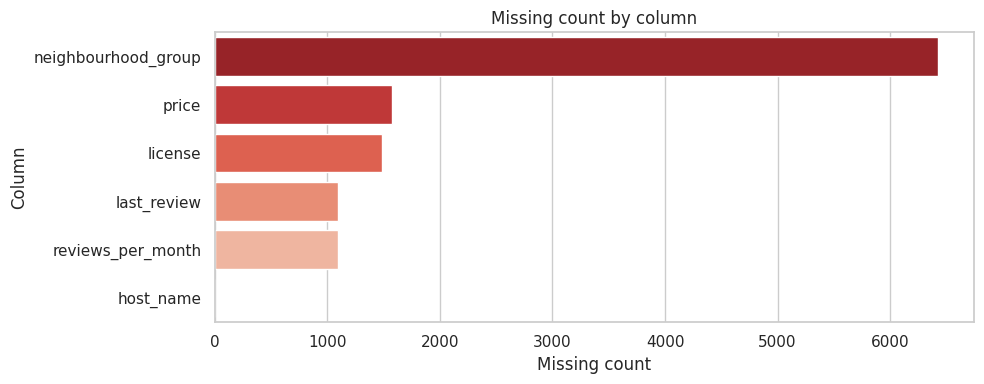

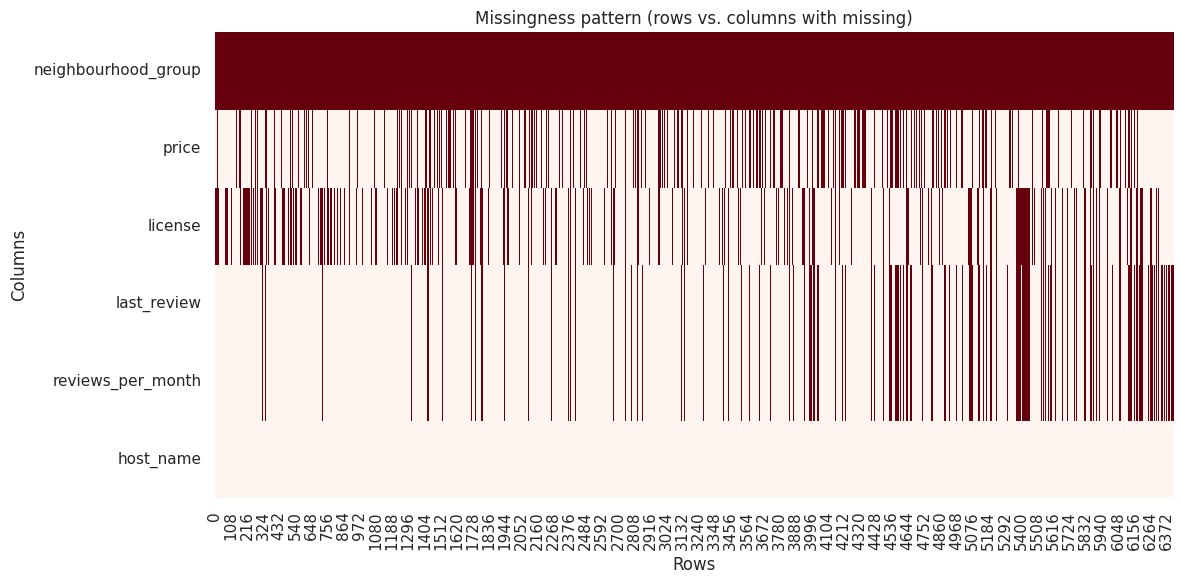

In [6]:
# =========================================
# Missingness Report + Visuals
# =========================================
import seaborn as sns, matplotlib.pyplot as plt

# טבלת חסרים (ספירה ואחוזים)
missing_count = df.isna().sum()
missing_pct   = (missing_count / len(df) * 100).round(1)
miss_tbl = (pd.DataFrame({'missing_count': missing_count, 'missing_%': missing_pct})
              .query('missing_count > 0')
              .sort_values('missing_count', ascending=False))

print("=== Missing values per column (only columns with missing) ===")
display(miss_tbl)

# גרף 1: barplot של מספר החסרים
if not miss_tbl.empty:
    plt.figure(figsize=(10, max(4, 0.35 * len(miss_tbl))))
    sns.barplot(x='missing_count', y=miss_tbl.index, data=miss_tbl, palette="Reds_r")
    plt.title('Missing count by column')
    plt.xlabel('Missing count'); plt.ylabel('Column')
    plt.tight_layout(); plt.show()

# גרף 2: heatmap של דפוסי חסרים
cols_with_na = miss_tbl.index.tolist()
if cols_with_na:
    plt.figure(figsize=(12, max(6, 0.6 * len(cols_with_na))))
    sns.heatmap(df[cols_with_na].isna().T, cbar=False, cmap='Reds')
    plt.title('Missingness pattern (rows vs. columns with missing)')
    plt.ylabel('Columns'); plt.xlabel('Rows')
    plt.tight_layout(); plt.show()


`<NA>` אסטרטגיית טיפול בחסרים: נגדיר כל שדה מספרי עם ערך חסר כטיפוס

דבר זה יאפשר לקומפיילר להתייחס אליהם כשדות חסרים ולא להחשיבם בחישוב ממוצע ושאר פעולות חשבוניות

בנוסף כאשר אין ביקורות כלל נגדיר אוטומטית את השדה של ביקורות ב12 החודשים האחרונים ב0 ואת השדה ביקורות כל חודש כ0

`NAT` בנוסף נגדיר

על ערכי תאריך חסרים זו צורה ידועה שמאפשרת לקומפיילר להתייחס לערכים אלו בצורה
נכונה.
זיהינו בנוסף בהצגה מספרית של הנתונים שקיימים נתונים לא הגיוניים עבור חדרים במלון שעולים 40000 או 50000 ללילה. נקבע רף גבוה של 5000 ללילה כדי להיפטר מערכים גבוהים מדי ולא הגיוניים ונגדיר שמעל סכום זה ערך החדר יוגדר כחסר ערך

In [7]:
# =========================================
# Missingness Cleaning & Column Filtering
# =========================================
import numpy as np

# השלמות לוגיות: אם אין ביקורות כלל → גם reviews_12m ו-reviews_per_month יהיו 0
if 'number_of_reviews' in df.columns:
    mask_zero_reviews = df['number_of_reviews'].fillna(0).eq(0)
    for c in ['reviews_12m','reviews_per_month']:
        if c in df.columns:
            df.loc[mask_zero_reviews, c] = 0.0

# הסרת עמודות לא אינפורמטיביות: ≥99% חסרים או ערך יחיד
MISSING_DROP_RATIO = 0.99
to_drop = [c for c in df.columns
           if (df[c].isna().mean() >= MISSING_DROP_RATIO) or (df[c].nunique(dropna=True) <= 1)]
if to_drop:
    df = df.drop(columns=to_drop)
    print("Dropped non-informative columns:", to_drop)

# נטרול מחירי־קצה לא סבירים
if 'price' in df.columns:
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    out_mask = df['price'] > 5000
    df.loc[out_mask, 'price'] = np.nan
    print("Set price>5000 to NaN:", int(out_mask.sum()))

print("\nPreview after cleaning:")
display(df.head(10))
display(df.tail(10))


Dropped non-informative columns: ['neighbourhood_group']
Set price>5000 to NaN: 26

Preview after cleaning:


listing_id                                               name  host_id  host_name  \
0        3344      White House-Center City, entire 2BR/2BA Condo     4957       A.J.   
1        3686                                    Vita's Hideaway     4645       Vita   
2        3943                   Historic Rowhouse Near Monuments     5059       Vasa   
3        4197                 Capitol Hill Bedroom walk to Metro     5061     Sandra   
4        4529                          Bertina's  House Part One     5803    Bertina   
5        5589                           Cozy apt in Adams Morgan     6527        Ami   
6        7103  Lovely guest suite in a quiet but close-in nei...    17633  Charlotte   
7       11785                           Sanctuary near Cathedral    32015     Teresa   
8       12442                     Peaches & Cream near Cathedral    32015     Teresa   
9       13744  Heart of the City -HalfBlock to METRO, Restaur...    53927   Victoria   

                                       neighbourhood  latitude  longitude        room_type  price  min_nights  \
0  Downtown, Chinatown, Penn Quarters, Mount Vern...  38.90145  -77.02679  Entire home/apt  150.0          59   
1                                 Historic Anacostia  38.86339  -76.98889     Private room   60.0          31   
2  Edgewood, Bloomingdale, Truxton Circle, Eckington  38.91195  -77.00456     Private room   79.0           1   
3                         Capitol Hill, Lincoln Park  38.88719  -76.99472     Private room  128.0           6   
4                       Eastland Gardens, Kenilworth  38.90585  -76.94469     Private room    NaN          30   
5     Kalorama Heights, Adams Morgan, Lanier Heights  38.91887  -77.04008  Entire home/apt   87.0          50   
6  Spring Valley, Palisades, Wesley Heights, Foxh...  38.91999  -77.09774  Entire home/apt   74.0          31   
7     Cathedral Heights, McLean Gardens, Glover Park  38.92622  -77.07591  Entire home/apt   90.0          31   
8     Cathedral Heights, McLean Gardens, Glover Park  38.92756  -77.07667     Private room   52.0          31   
9  Columbia Heights, Mt. Pleasant, Pleasant Plain...  38.92836  -77.03136  Entire home/apt  125.0          30   

   number_of_reviews last_review  reviews_per_month  host_listings  availability_365  reviews_12m  \
0                 10  2016-08-31               0.05              2               362            0   
1                 84  2023-08-30               0.47              1               298            0   
2                546  2025-05-27               2.78              5               331           41   
3                 67  2025-05-20               0.34              2               346            6   
4                102  2019-07-05               0.53              2                63            0   
5                 96  2023-08-17               0.50              1               133            0   
6                 91  2022-06-03               0.49             22               319            0   
7                416  2025-05-31               2.21              4               269            2   
8                120  2024-12-20               0.65              4               303            2   
9                 38  2023-11-14               0.21              1               225            0   

                            license  
0                               NaN  
1                               NaN  
2  Hosted License: 5007242201001033  
3  Hosted License: 5007242201000749  
4                            Exempt  
5                               NaN  
6                               NaN  
7                               NaN  
8                               NaN  
9  Hosted License: 5007242201000873

listing_id                                               name    host_id        host_name  \
6413  1442027984941258635                     charming fully-furnished 1-bed    7650266          Timothy   
6414  1442074072737222710  Sojourn Capitol Hill Light, Airy with Rooftop ...   39930655          Sojourn   
6415  1442078061748658545         Sojourn Renovated in Capitol Hill Hideaway   39930655          Sojourn   
6416  1442343218719127462                          Bella Casa Unit 5 Room #2  204823537          Susanna   
6417  1442890811375426077                              Heart of Capitol Hill  559214407            Julia   
6418  1443567975877895694                            Private room in a house  163382662         Yessenia   
6419  1443572528319441839                         Ità Vero DC 1-Bdrm Lux Apt  481329106           Jeremy   
6420  1443610914059176725                    Stylish&Central 1BR+Den Retreat   85381411          Gregory   
6421  1444285415800607440                         White Brick Retreat - Shaw   46630199  Home Sweet City   
6422  1444333353652565632            Lovely Luscious Cozy & Spacious Bedroom  680568102           Jumoke   

                                          neighbourhood   latitude  longitude        room_type  price  min_nights  \
6413  Cleveland Park, Woodley Park, Massachusetts Av...  38.925390 -77.057810  Entire home/apt  129.0          31   
6414                         Capitol Hill, Lincoln Park  38.888030 -76.985105  Entire home/apt  323.0          31   
6415                         Capitol Hill, Lincoln Park  38.888030 -76.985105  Entire home/apt  111.0          31   
6416     Ivy City, Arboretum, Trinidad, Carver Langston  38.904290 -76.973810     Private room   75.0          31   
6417          Union Station, Stanton Park, Kingman Park  38.896060 -76.989530  Entire home/apt  105.0          31   
6418  Columbia Heights, Mt. Pleasant, Pleasant Plain...  38.937243 -77.034815     Private room   45.0          31   
6419  Southwest Employment Area, Southwest/Waterfron...  38.867280 -77.011140  Entire home/apt  141.0           2   
6420  Columbia Heights, Mt. Pleasant, Pleasant Plain...  38.934189 -77.028164  Entire home/apt  165.0           1   
6421                                 Shaw, Logan Circle  38.911334 -77.020328  Entire home/apt  122.0           2   
6422     Ivy City, Arboretum, Trinidad, Carver Langston  38.909697 -76.987073     Private room   55.0           1   

      number_of_reviews last_review  reviews_per_month  host_listings  availability_365  reviews_12m  \
6413                  0         NaT                0.0             55               365            0   
6414                  0         NaT                0.0            257               340            0   
6415                  0         NaT                0.0            257               360            0   
6416                  0         NaT                0.0              2               365            0   
6417                  0         NaT                0.0              1                83            0   
6418                  0         NaT                0.0              1                63            0   
6419                  0         NaT                0.0              3               356            0   
6420                  0         NaT                0.0              1               364            0   
6421                  0         NaT                0.0             85               194            0   
6422                  0         NaT                0.0              3                52            0   

                               license  
6413                               NaN  
6414                            Exempt  
6415                            Exempt  
6416                               NaN  
6417                               NaN  
6418                               NaN  
6419                            Exempt  
6420  Hosted License: 5007262201003245  
6421  Hosted License: 50

ההצגה מראה כי 26 ערכים גבוהים מ5000 דולר שונו ללא מוגדרים ובנוסף עמודות ריקות הוסרו ועמודות של ביקורות פר חודש וביקורות ב12 חודשים האחרונים שונו ל0 כאשר סך הביקורות הוא 0

In [8]:


df_new = df.copy()

# --- 1) קטגוריות מחיר (דוגמה: זול/בינוני/יקר) ---
df_new['price_category'] = pd.cut(
    df_new['price'],
    bins=[-1, 100, 300, float('inf')],
    labels=['זול', 'בינוני', 'יקר']
).astype('category')

# --- 2) ניסיון מארח לפי מספר דירות ---
if 'host_listings' in df_new.columns:
    df_new['host_experience'] = pd.cut(
        df_new['host_listings'],
        bins=[-1, 2, 5, float('inf')],
        labels=['חדש', 'בינוני', 'מנוסה']
    ).astype('category')

# --- 3) מידת זמינות לפי availability_365 ---
def availability_level(x):
    if pd.isna(x):
        return 'לא ידוע'
    elif x < 120:
        return 'נמוכה'
    elif 120 <= x <= 250:
        return 'בינונית'
    else:
        return 'גבוהה'

df_new['availability_level'] = df_new['availability_365'].apply(availability_level).astype('category')

# --- הצגה ---
print("עמודות חדשות נוספו:")
display(df_new[['price', 'price_category',
                'host_listings', 'host_experience',
                'availability_365', 'availability_level']].head(15))


עמודות חדשות נוספו:


price price_category  host_listings host_experience  availability_365 availability_level
0   150.0         בינוני              2             חדש               362              גבוהה
1    60.0            זול              1             חדש               298              גבוהה
2    79.0            זול              5          בינוני               331              גבוהה
3   128.0         בינוני              2             חדש               346              גבוהה
4     NaN            NaN              2             חדש                63              נמוכה
5    87.0            זול              1             חדש               133            בינונית
6    74.0            זול             22           מנוסה               319              גבוהה
7    90.0            זול              4          בינוני               269              גבוהה
8    52.0            זול              4          בינוני               303              גבוהה
9   125.0         בינוני              1             חדש               225            בינונית
10   64.0            זול              4          בינוני               287              גבוהה
11   64.0            זול              4          בינוני               321              גבוהה
12   70.0            זול              2             חדש               287              גבוהה
13  229.0         בינוני             11           מנוסה               330              גבוהה
14    NaN            NaN              2             חדש               273              גבוהה

הוספת עמודות של קטגורית מחיר  קטגורית ניסיון מארח וקטגורית רמת זמינות

In [9]:
# =========================================
# Clear EDA plots — קשרים בין משתנים + 20 המארחים המובילים
# =========================================
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# ---------- עזר: חיתוך קצה עליון לשיפור קריאות צירים ----------
def qclip(s: pd.Series, q=0.99):
    # מבטיח טיפוס מספרי, מחשב קוונטיל עליון וגוזר ערכים קיצוניים
    s_num = pd.to_numeric(s, errors='coerce')
    hi = s_num.quantile(q)
    return s_num.clip(upper=hi)

def _maybe_sample(df_in: pd.DataFrame, max_n: int = 80000, random_state: int = 42):
    # דגימה עבור פיזור נקודות כדי לשמור על ביצועים וקריאות
    if len(df_in) > max_n:
        return df_in.sample(n=max_n, random_state=random_state)
    return df_in

# ---------- הבטחת טיפוסים מספריים לעמודות מרכזיות ----------
for c in ['price','number_of_reviews','availability_365','reviews_12m','host_listings']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

הגדרות כדי לקרוא נכון את הנתונים ולשמור על גרפים נקיים

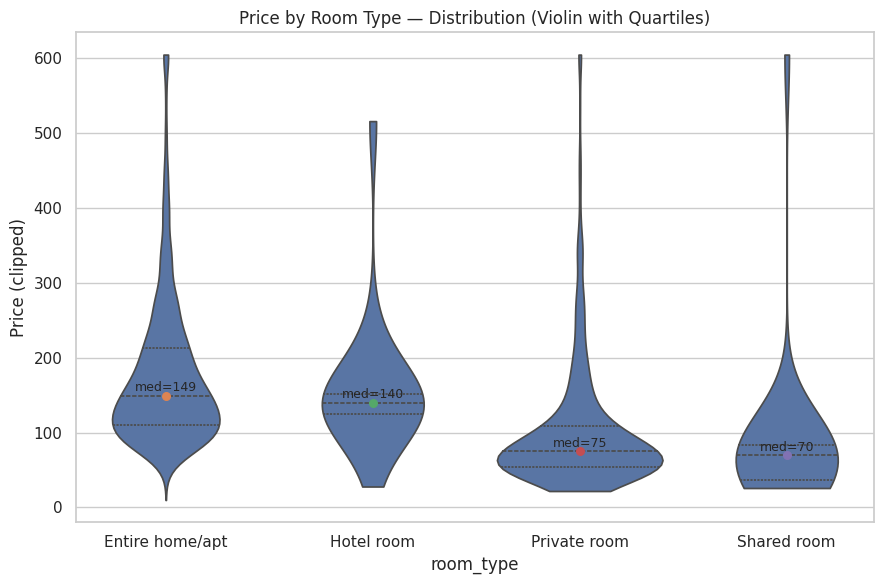

In [10]:

# ======================================================
# 1) מחיר לפי סוג חדר — ויולין־פלוט + קווי קוונטילים
# ======================================================
if {'room_type','price'}.issubset(df.columns):
    tmp = df[['room_type','price']].dropna().copy()
    tmp['price_c'] = qclip(tmp['price'], 0.99)

    order = (tmp.groupby('room_type')['price_c'].median()
                 .sort_values(ascending=False).index)

    plt.figure(figsize=(9,6))
    sns.violinplot(data=tmp, x='room_type', y='price_c', order=order,
                   inner='quartile', cut=0)
    med = tmp.groupby('room_type')['price_c'].median().reindex(order)
    for i, (cat, y) in enumerate(med.items()):
        plt.scatter(i, y, s=30, zorder=3)
        plt.text(i, y*1.02, f"med={y:.0f}", ha='center', va='bottom', fontsize=9)
    plt.title('Price by Room Type — Distribution (Violin with Quartiles)')
    plt.xlabel('room_type'); plt.ylabel('Price (clipped)')
    plt.tight_layout(); plt.show()


מסקנה מהגרף: עלות ממוצעת של השכרת בית הכי גבוהה אחריה חדר במלון ואחריה חדר פרטי והכי זול בממוצע זה חדר משותף.

/tmp/ipython-input-2998444016.py:14: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


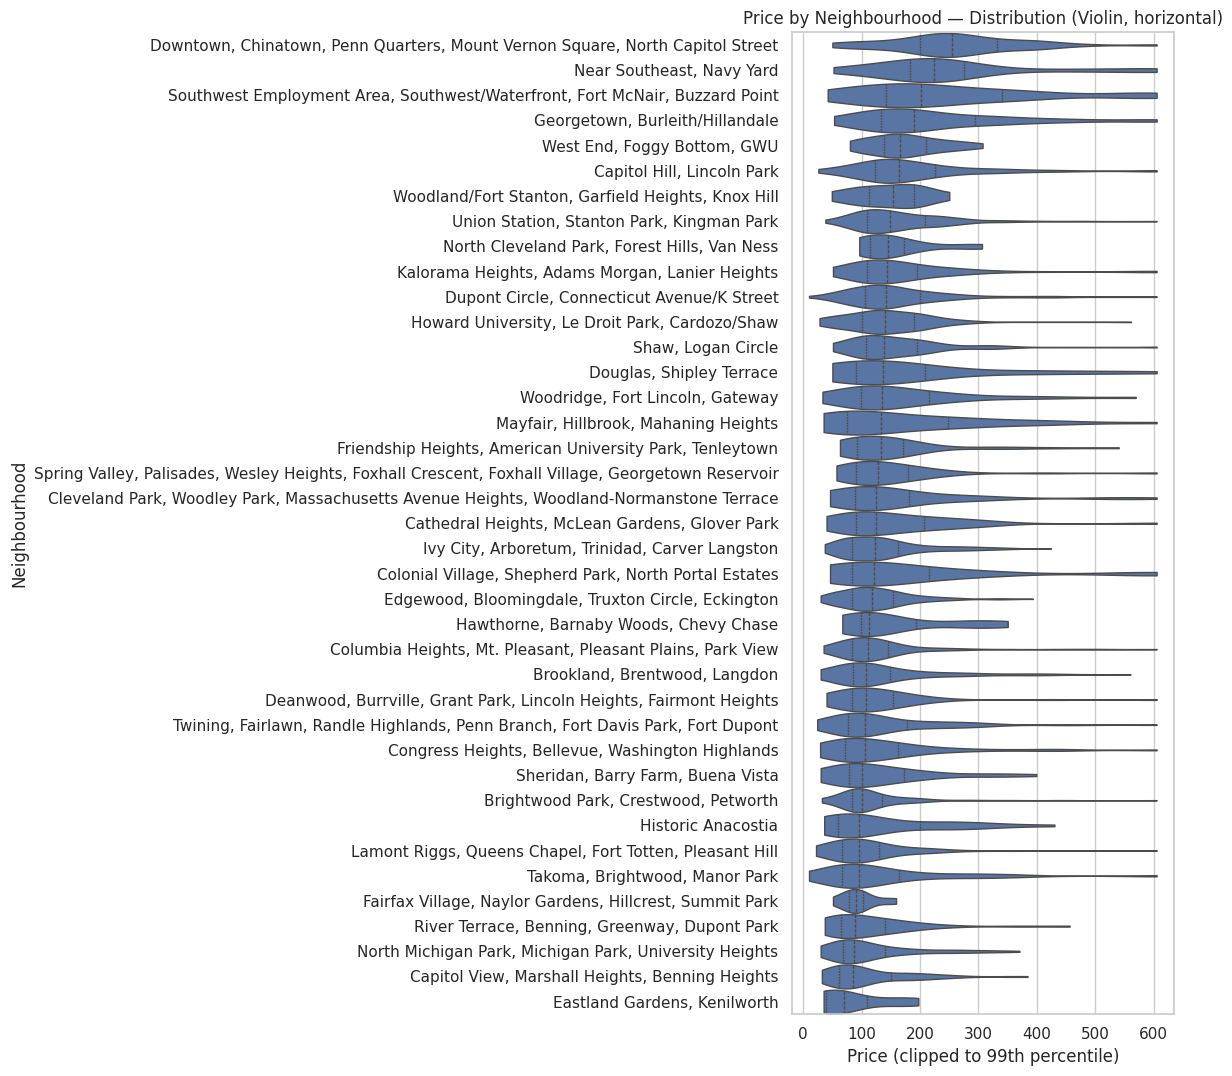

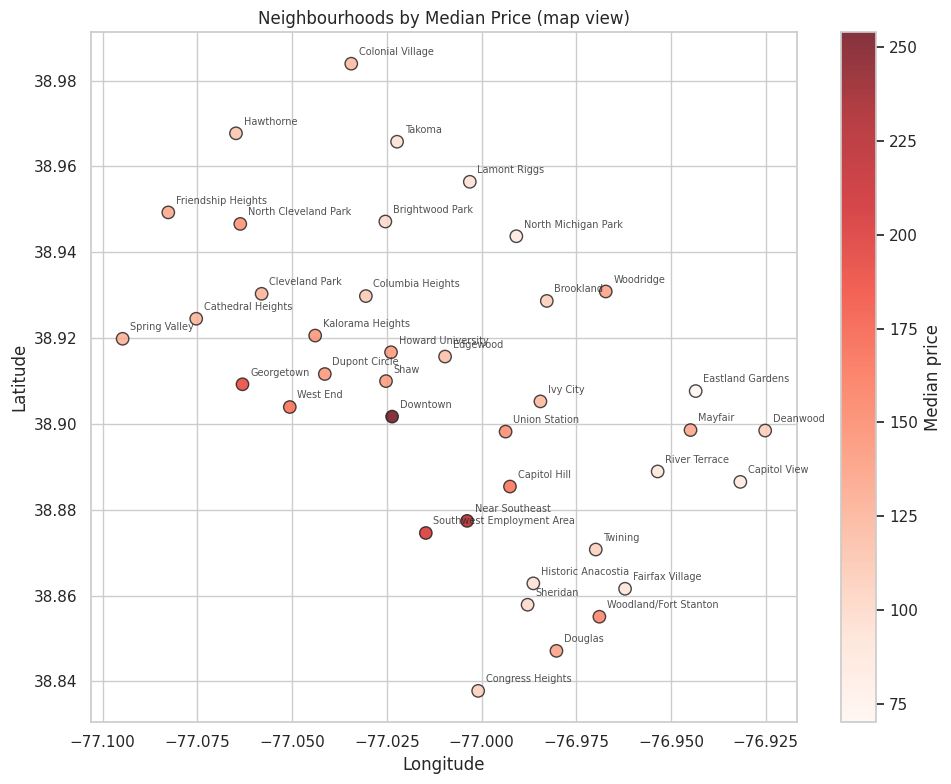

In [11]:


# ======================================================
# 2) מחיר לפי שכונה — Violin plot אופקי עם התאמת גובה דינמית
# ======================================================
if {'neighbourhood','price'}.issubset(df.columns):
    tmp = df[['neighbourhood','price']].dropna().copy()
    q_hi = tmp['price'].quantile(0.99)
    tmp['price_c'] = tmp['price'].clip(upper=q_hi)

    order = (tmp.groupby('neighbourhood')['price_c']
                .median().sort_values(ascending=False).index)

    fig_h = max(8, 0.28 * len(order))
    plt.figure(figsize=(12, fig_h))
    sns.violinplot(
        data=tmp, y='neighbourhood', x='price_c',
        order=order, orient='h',
        inner='quartile', cut=0, scale='width', width=0.95, linewidth=1
    )
    plt.title('Price by Neighbourhood — Distribution (Violin, horizontal)')
    plt.xlabel('Price (clipped to 99th percentile)')
    plt.ylabel('Neighbourhood')
    plt.tight_layout(); plt.show()

# ======================================================
# מפה: כל השכונות עם שם מקוצר עד הפסיק
# ======================================================
if {'neighbourhood','price','latitude','longitude'}.issubset(df.columns):
    tmp = df[['neighbourhood','price','latitude','longitude']].dropna().copy()
    tmp['price_c'] = tmp['price'].clip(upper=tmp['price'].quantile(0.99))

    # חישוב חציון מחיר ומיקום ממוצע לכל שכונה
    neigh_stats = tmp.groupby('neighbourhood').agg(
        median_price=('price_c','median'),
        lat=('latitude','mean'),
        lon=('longitude','mean')
    ).reset_index()

    # קיצור שם שכונה עד הפסיק הראשון
    neigh_stats['short_name'] = neigh_stats['neighbourhood'].apply(lambda x: x.split(',')[0])

    plt.figure(figsize=(10,8))
    scatter = plt.scatter(
        neigh_stats['lon'], neigh_stats['lat'],
        c=neigh_stats['median_price'], cmap='Reds', s=80, alpha=0.8, edgecolor='k'
    )
    plt.colorbar(scatter, label='Median price')

    # תוויות עם שם מקוצר
    for _, row in neigh_stats.iterrows():
        plt.text(row['lon']+0.002, row['lat']+0.002, row['short_name'],
                 fontsize=7, alpha=0.8)

    plt.title('Neighbourhoods by Median Price (map view)')
    plt.xlabel('Longitude'); plt.ylabel('Latitude')
    plt.tight_layout(); plt.show()



מסקנה: לפי מפת הנקודות רואים כי השכונות היקרות נמצאות פחות או יותר באותו איזור ועל פי חקר נוסף שעשיתי על העיר האיזור הזה הוא איזור שנחשב למרכז העיר ונחשב לאיזור התיירותי והעסקי של וושינגטון ולכן מתומחר בהתאם

/tmp/ipython-input-4074531891.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=tmp, x='room_type', y='avail_c',


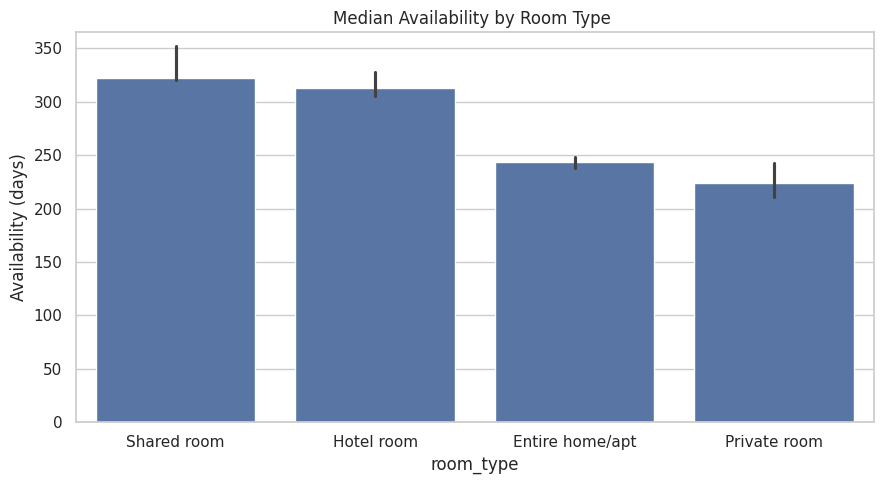

In [12]:


# ======================================================
# 4) זמינות לפי סוג חדר
# ======================================================
if {'room_type','availability_365'}.issubset(df.columns):
    tmp = df[['room_type','availability_365']].dropna().copy()
    tmp['avail_c'] = tmp['availability_365'].clip(lower=0, upper=365)
    order = (tmp.groupby('room_type')['avail_c'].median()
                 .sort_values(ascending=False).index)

    plt.figure(figsize=(9,5))
    sns.barplot(data=tmp, x='room_type', y='avail_c',
                estimator=np.median, ci=95, order=order)
    plt.title('Median Availability by Room Type ')
    plt.xlabel('room_type'); plt.ylabel('Availability (days)')
    plt.ylim(0,365)
    plt.tight_layout(); plt.show()

מסקנה: באופן כללי חדרים משותפים וחדרים במלון זמינים יותר מחדרים פרטיים או מהשכרת בתים

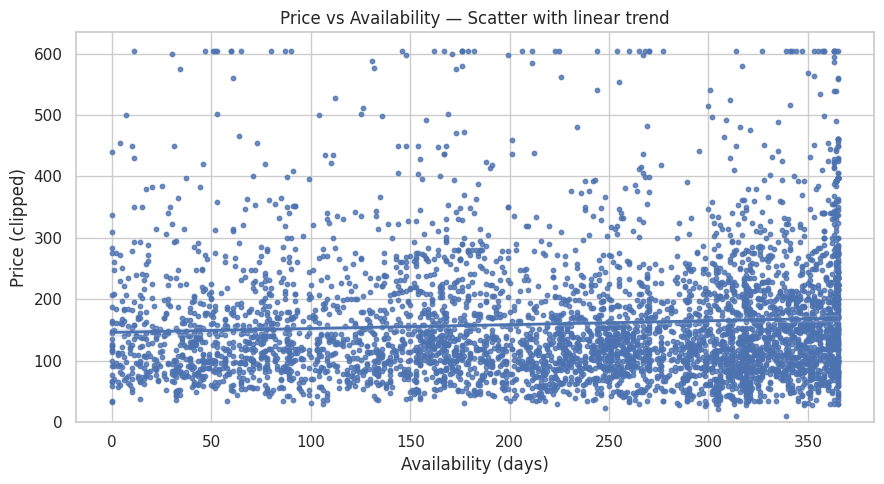

/tmp/ipython-input-2953302115.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = (tmp.groupby('avail_bin')['price_c']


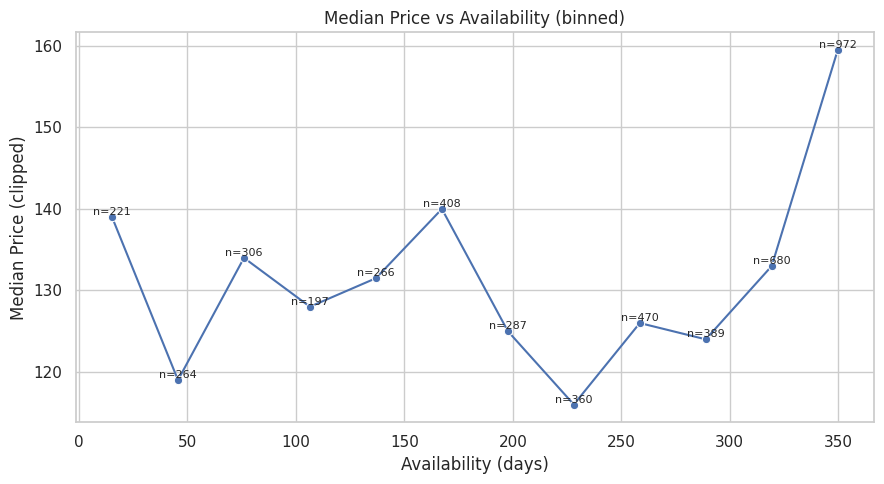

In [13]:


# ======================================================
# 5) מחיר מול זמינות — Scatter שקוף + קו מגמה, ואחריו קו חציונים על בינים
# ======================================================
if {'availability_365','price'}.issubset(df.columns):
    tmp = df[['availability_365','price']].dropna().copy()
    tmp['avail_c'] = pd.to_numeric(tmp['availability_365'], errors='coerce').clip(0,365)
    tmp['price_c'] = qclip(tmp['price'], 0.99)

    tmp_scatter = _maybe_sample(tmp[['avail_c','price_c']])

    # (א) Scatter + קו מגמה לינארי
    plt.figure(figsize=(9,5))
    sns.regplot(
        data=tmp_scatter, x='avail_c', y='price_c',
        scatter_kws={'alpha':0.8, 's':10, 'linewidths':1},
        line_kws={'lw':2}
    )
    plt.title('Price vs Availability — Scatter with linear trend')
    plt.xlabel('Availability (days)'); plt.ylabel('Price (clipped)')
    plt.ylim(bottom=0)
    plt.tight_layout(); plt.show()

    # (ב) קו חציונים על בינים
    bins = np.linspace(0, 365, 13)
    tmp['avail_bin'] = pd.cut(tmp['avail_c'], bins=bins, include_lowest=True)
    agg = (tmp.groupby('avail_bin')['price_c']
             .agg(median='median', count='size')
             .reset_index())
    agg['bin_center'] = agg['avail_bin'].apply(lambda iv: (iv.left + iv.right)/2)

    plt.figure(figsize=(9,5))
    sns.lineplot(data=agg, x='bin_center', y='median', marker='o')
    for x, y, n in zip(agg['bin_center'], agg['median'], agg['count']):
        if n > 0:
            plt.text(x, y, f"n={n}", ha='center', va='bottom', fontsize=8)
    plt.title('Median Price vs Availability (binned)')
    plt.xlabel('Availability (days)'); plt.ylabel('Median Price (clipped)')
    plt.tight_layout(); plt.show()


מסקנה: אין עקביות בקשר בין זמינות למחיר אמנם מובהק הקשר בין זמינות של כמעט כל השנה לבין מחיר  אולי זה מרמז כי אלו בתים של מארחים שנועדים רק להשכרה וזה המקצוע שלהם ולכן התמחור בהתאם.

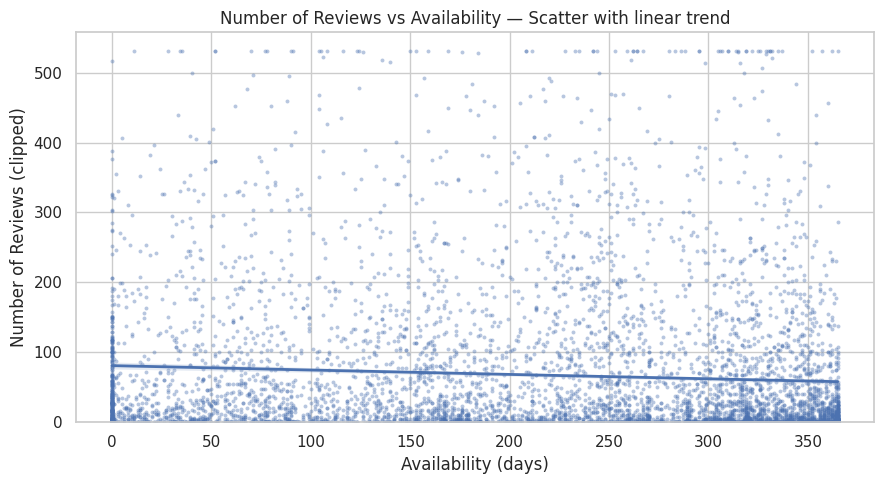

/tmp/ipython-input-3139362528.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = (tmp.groupby('avail_bin')['reviews_c']


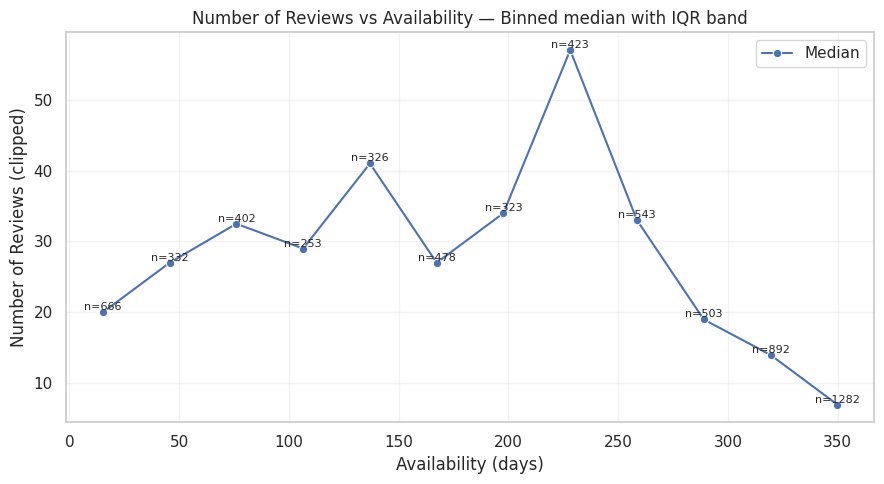

In [14]:

# 6) מספר ביקורות מול זמינות — Scatter שקוף + קו מגמה, ואז קו חציוני + IQR

if {'availability_365','number_of_reviews'}.issubset(df.columns):
    tmp = df[['availability_365','number_of_reviews']].dropna().copy()
    tmp['avail_c'] = pd.to_numeric(tmp['availability_365'], errors='coerce').clip(0,365)
    tmp['reviews_c'] = pd.to_numeric(tmp['number_of_reviews'], errors='coerce')
    tmp['reviews_c'] = tmp['reviews_c'].clip(upper=tmp['reviews_c'].quantile(0.99))

    tmp_scatter = _maybe_sample(tmp[['avail_c','reviews_c']])

    # (א) Scatter + קו מגמה לינארי
    plt.figure(figsize=(9,5))
    sns.regplot(
        data=tmp_scatter, x='avail_c', y='reviews_c',
        scatter_kws={'alpha':0.4, 's':8, 'linewidths':0},
        line_kws={'lw':2}
    )
    plt.title('Number of Reviews vs Availability — Scatter with linear trend')
    plt.xlabel('Availability (days)'); plt.ylabel('Number of Reviews (clipped)')
    plt.ylim(bottom=0)
    plt.tight_layout(); plt.show()

    # (ב) קו חציוני + רצועת IQR על בינים
    bins = np.linspace(0, 365, 13)
    tmp['avail_bin'] = pd.cut(tmp['avail_c'], bins=bins, include_lowest=True)
    agg = (tmp.groupby('avail_bin')['reviews_c']
             .agg(q1=lambda s: s.quantile(0.25),
                  median='median',
                  q3=lambda s: s.quantile(0.75),
                  count='size')
             .reset_index())
    agg['bin_center'] = agg['avail_bin'].apply(lambda iv: (iv.left + iv.right)/2)

    plt.figure(figsize=(9,5))
    sns.lineplot(data=agg, x='bin_center', y='median', marker='o', label='Median')
    for x, y, n in zip(agg['bin_center'], agg['median'], agg['count']):
        if n > 0:
            plt.text(x, y, f"n={n}", ha='center', va='bottom', fontsize=8)
    plt.title('Number of Reviews vs Availability — Binned median with IQR band')
    plt.xlabel('Availability (days)'); plt.ylabel('Number of Reviews (clipped)')
    plt.grid(True, alpha=0.25)
    plt.legend()
    plt.tight_layout(); plt.show()

מסקנה: אין ממש קשר בין מספר ביקורות לבין זמינות

/tmp/ipython-input-2901995520.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hosts['listings'], y=top_hosts['label'], orient='h', palette='mako')


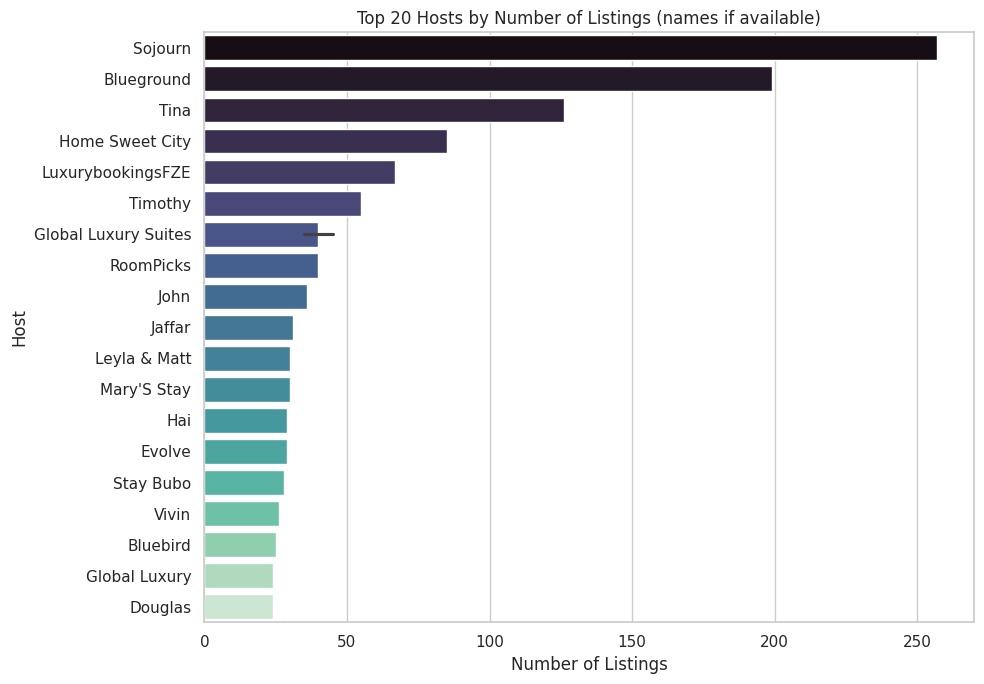

In [15]:


# 8) 20 המארחים עם הכי הרבה נכסים — גרף אופקי
if 'host_id' in df.columns:
    host_label = 'host_name' if 'host_name' in df.columns else None
    grp = (df.groupby('host_id')
             .agg(listings=('host_id','size'),
                  host_name=(host_label, 'first') if host_label else ('host_id','first'))
             .reset_index())
    grp['label'] = grp['host_name'].fillna(grp['host_id'].astype(str))
    top_hosts = grp.sort_values('listings', ascending=False).head(20)

    plt.figure(figsize=(10,7))
    sns.barplot(x=top_hosts['listings'], y=top_hosts['label'], orient='h', palette='mako')
    plt.title('Top 20 Hosts by Number of Listings (names if available)')
    plt.xlabel('Number of Listings'); plt.ylabel('Host')
    plt.tight_layout(); plt.show()


מחקר הנתונים עד כה ראינו כי יש קשר בין משתנים שונים בטבלה:
בהסתכלות על סוג חדר ראינו כי עלות ממוצעת של השכרת בית הכי גבוהה אחריה חדר במלון ואחריה חדר פרטי והכי זול בממוצע זה חדר משותף.
בנוסף ראינו כי יש פער מבחינת תמחור בין שכונות מסוימות ומחקר נוסף על פי המיקום שלהם ראינו כי השכונות שמתומחרות גבוה בדרך כלל נמצאות בלב העיר מבחינה תיירותית ועסקית ואילו השכונות שמתומחרות בזול יותר לרוב נמצאות בשולי העיר.
בנוסף ראינו שרמת הזמינות לא בהכרח משפיעה על המחיר אך בנכסים שפנויים כל השנה המחיר מעט גבוה יותר. והצענו הסבר  לזה שיכול להיות שאלו דירות שמוחזקות על ידי מארחים שעוסקים בשוק ההשכרות בצורה מקצועית ומסחרית ולכן התמחור בהתאם.
ראינו בנוסף כי אין ממש קשר בין כמות ביקורות לזמינות הנכס וכי ישנם מארחים עם כמות גבוהה של נכסים. מתחיל בעשרות ויכול להגיע אפילו למאות נכסים.

In [38]:

# Airbnb — Full plots for Q1–Q11
# Categories on Y-axis (vertical list of names), Top-10 per chart

import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# ---------- Helpers ----------
def qclip(s: pd.Series, q=0.99):
    # Convert to numeric and clip the upper tail to keep axes readable
    s_num = pd.to_numeric(s, errors='coerce')
    hi = s_num.quantile(q)
    return s_num.clip(upper=hi)

def top_vals(df: pd.DataFrame, col='neighbourhood', n=10):
    # Return Top-n category names by number of listings
    return df[col].value_counts().head(n).index

def maybe_sample(df_in: pd.DataFrame, max_n: int = 80000, random_state: int = 42):
    # Downsample for scatter density to keep rendering responsive
    if len(df_in) > max_n:
        return df_in.sample(n=max_n, random_state=random_state)
    return df_in

# Choose grouping column: neighbourhood_group if exists, else neighbourhood
group_col = 'neighbourhood_group' if 'neighbourhood_group' in df.columns else 'neighbourhood'

הגדרות ראשוניות

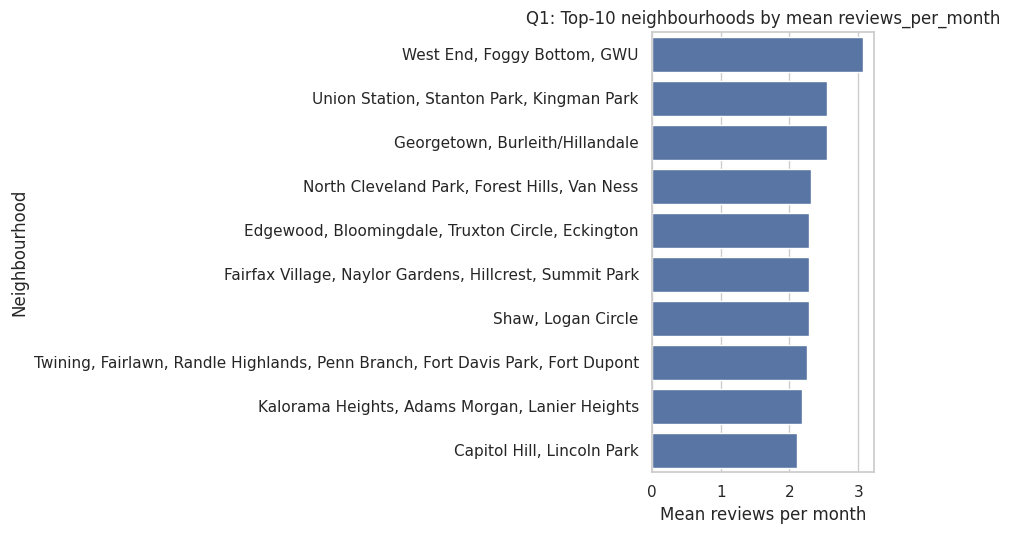

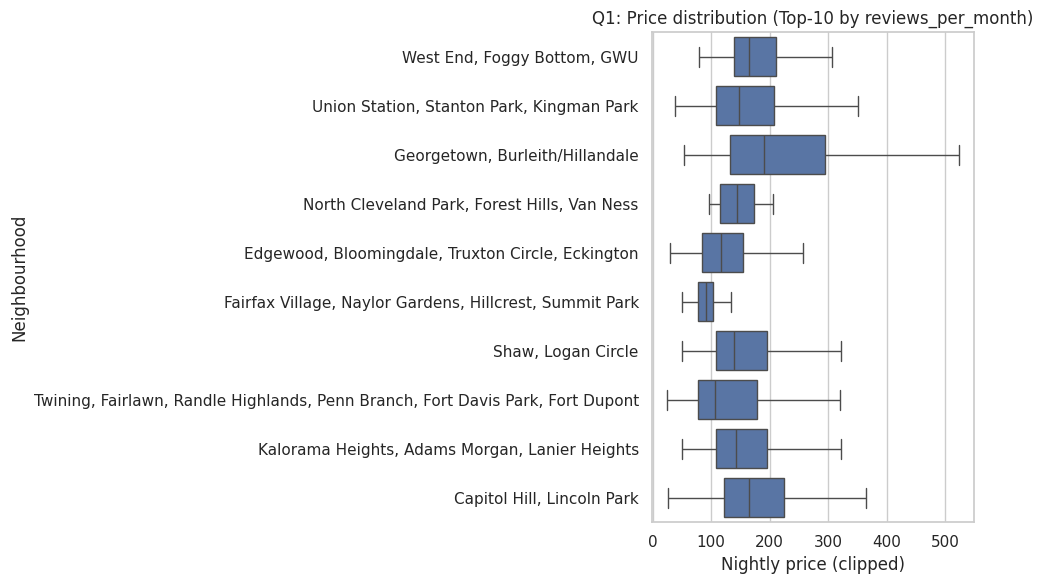

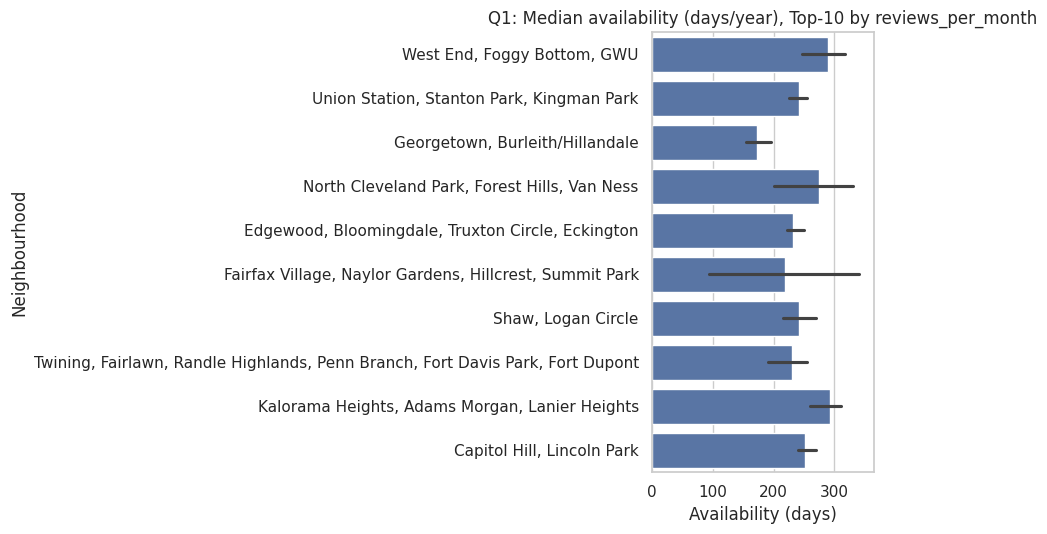

In [39]:
# Q1 — Most popular neighbourhoods (Top-10 by reviews_per_month) + price & availability

if {'neighbourhood','price','availability_365','reviews_per_month'}.issubset(df.columns):
    # Base frame
    tmp = df[['neighbourhood','price','availability_365','reviews_per_month']].dropna().copy()
    tmp['price_c'] = qclip(tmp['price'], 0.99)

    # (a) Popularity metric = mean reviews_per_month per neighbourhood
    pop_mean = (tmp.groupby('neighbourhood')['reviews_per_month']
                  .mean()
                  .sort_values(ascending=False))
    top10 = pop_mean.index[:10].tolist()
    tmp10 = tmp[tmp['neighbourhood'].isin(top10)].copy()

    # (a) Barplot: Top-10 by mean reviews_per_month
    plt.figure(figsize=(9,5.5))
    sns.barplot(y=top10, x=pop_mean.loc[top10].values, order=top10)
    plt.title('Q1: Top-10 neighbourhoods by mean reviews_per_month')
    plt.xlabel('Mean reviews per month'); plt.ylabel('Neighbourhood')
    plt.tight_layout(); plt.show()

    # (b) Price distribution per neighbourhood (boxplots) — same Top-10 set
    plt.figure(figsize=(10,6))
    sns.boxplot(data=tmp10, y='neighbourhood', x='price_c',
                showfliers=False, order=top10)
    plt.title('Q1: Price distribution (Top-10 by reviews_per_month)')
    plt.xlabel('Nightly price (clipped)'); plt.ylabel('Neighbourhood')
    plt.tight_layout(); plt.show()

    # (c) Median availability (days/year) per neighbourhood — same Top-10 set
    plt.figure(figsize=(9,5.5))
    sns.barplot(data=tmp10, y='neighbourhood', x='availability_365',
                estimator=np.median, order=top10)
    plt.title('Q1: Median availability (days/year), Top-10 by reviews_per_month')
    plt.xlabel('Availability (days)'); plt.ylabel('Neighbourhood')
    plt.xlim(0, 365)
    plt.tight_layout(); plt.show()


הגרף הראשון מראה את השכונות הכי פופולריים על ידי כמות ביקורות בכל חודש בממוצע בשכונה
יתר הגרפים מראים כי אין קשר בין הפופולריות של השכונה לבין הזמינות או המחיר על ידי הצגת ממוצע מחירים וזמינות ממוצעת בשכונות שהוצגו קודם לכן כפופולריות.

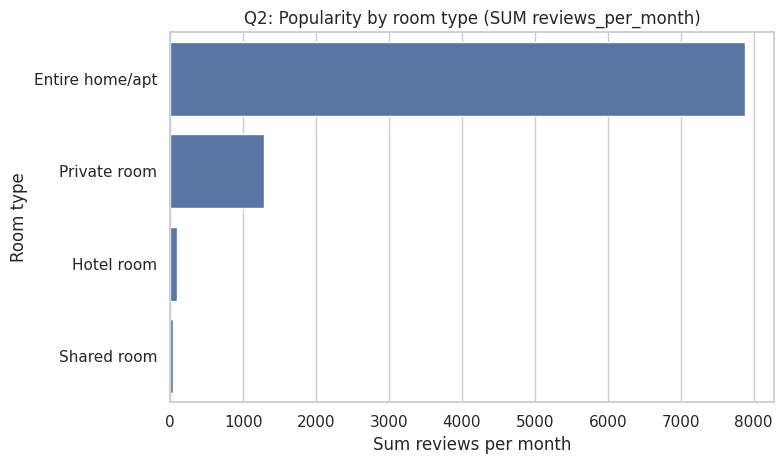

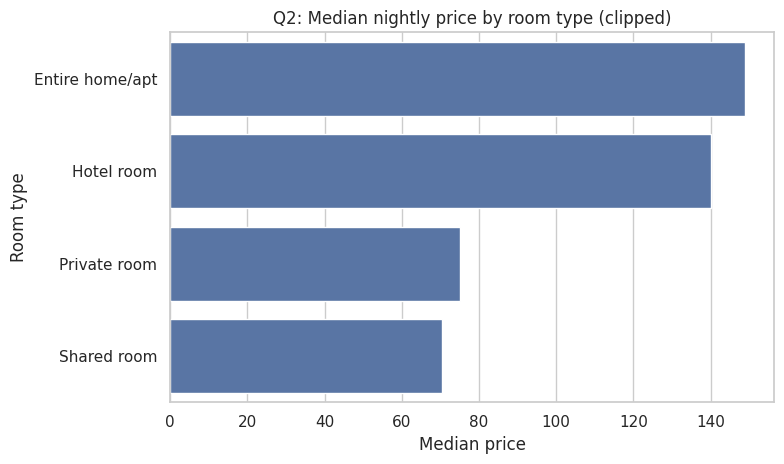

In [40]:
# Q2 — Room type patterns: popularity (SUM reviews_per_month) + median price

if {'room_type','price','reviews_per_month'}.issubset(df.columns):
    tmp = df[['room_type','price','reviews_per_month']].dropna().copy()
    tmp['price_c'] = qclip(tmp['price'], 0.99)

    # Popularity by room type = SUM reviews_per_month (higher → more activity overall)
    pop_tbl = (tmp.groupby('room_type', as_index=False)['reviews_per_month']
                 .sum()
                 .rename(columns={'reviews_per_month':'sum_reviews_pm'}))
    pop_tbl = pop_tbl.sort_values('sum_reviews_pm', ascending=False)

    plt.figure(figsize=(8,4.8))
    sns.barplot(data=pop_tbl, y='room_type', x='sum_reviews_pm', order=pop_tbl['room_type'])
    plt.title('Q2: Popularity by room type (SUM reviews_per_month)')
    plt.xlabel('Sum reviews per month'); plt.ylabel('Room type')
    plt.tight_layout(); plt.show()

    # Median price by room type — sorted by price (independent order)
    med_tbl = (tmp.groupby('room_type', as_index=False)['price_c']
                 .median()
                 .rename(columns={'price_c':'median_price'}))
    med_tbl = med_tbl.sort_values('median_price', ascending=False)

    plt.figure(figsize=(8,4.8))
    sns.barplot(data=med_tbl, y='room_type', x='median_price', order=med_tbl['room_type'])
    plt.title('Q2: Median nightly price by room type (clipped)')
    plt.xlabel('Median price'); plt.ylabel('Room type')
    plt.tight_layout(); plt.show()


הנתונים מהגרף הראשון מציגים כי הנכס הכי פופולרי בפער הוא השכרת בית שלם ולאחריו השכרת חדר פרטי וכמעט אין נתוני הזמנות בחדרים משותפים ובחדר במלון.
הנתונים מהגרף השני מראים כי השכרת בית היא היקרה מבין האפשרויות לאחריה חדר במלון ולבסוף חדר פרטי וחדר משותף הינם הזולות מבין האפשרויות

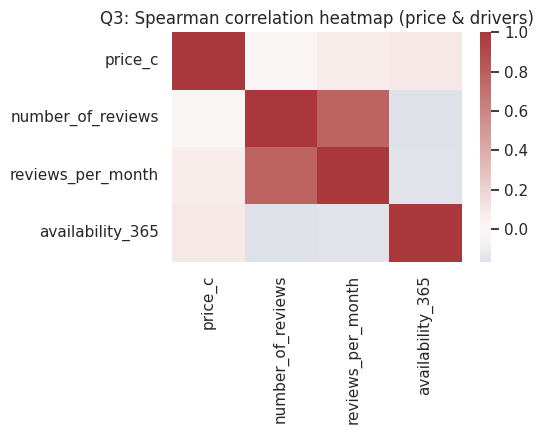

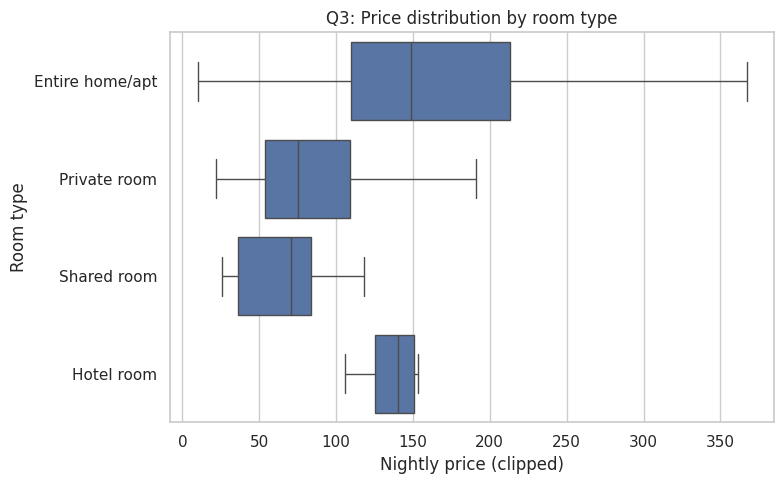

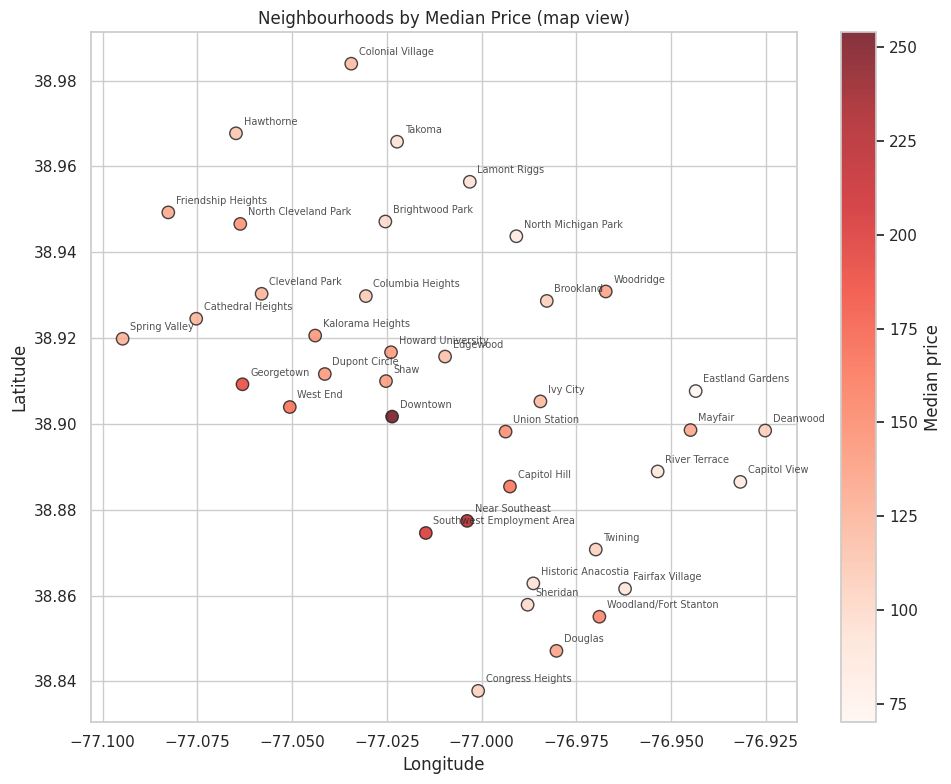

In [41]:
# Q3 — Drivers of price (barplot correlations + boxplot for room_type)
# (הצגת קורלציות גם כ-heatmap מצומצם לשיפור קריאות יחסים מספריים)


cand_cols = [c for c in [
    'number_of_reviews','reviews_per_month','availability_365',
    'minimum_nights','calculated_host_listings_count', 'Longitude', 'Latitude'
] if c in df.columns]

if 'price' in df.columns and len(cand_cols)>0:
    tmp = df[['price']+cand_cols].dropna().copy()
    tmp['price_c'] = qclip(tmp['price'], 0.99)

    # (א) Heatmap קומפקטי של הקורלציות להצגה גרפית
    corr_mat = tmp[['price_c']+cand_cols].corr(method='spearman', numeric_only=True)
    plt.figure(figsize=(1.2*len(cand_cols)+2, 4.5))
    sns.heatmap(corr_mat, cmap='vlag', center=0, annot=False, square=False)
    plt.title('Q3: Spearman correlation heatmap (price & drivers)')
    plt.tight_layout(); plt.show()

    # (ב) Boxplot of room_type vs price
    if 'room_type' in df.columns:
        tmp2 = df[['room_type','price']].dropna().copy()
        tmp2['price_c'] = qclip(tmp2['price'], 0.99)
        plt.figure(figsize=(8,5))
        sns.boxplot(data=tmp2, y='room_type', x='price_c', showfliers=False)
        plt.title('Q3: Price distribution by room type')
        plt.xlabel('Nightly price (clipped)'); plt.ylabel('Room type')
        plt.tight_layout(); plt.show()


if {'neighbourhood','price','latitude','longitude'}.issubset(df.columns):
    tmp = df[['neighbourhood','price','latitude','longitude']].dropna().copy()
    tmp['price_c'] = tmp['price'].clip(upper=tmp['price'].quantile(0.99))


    # חישוב חציון מחיר ומיקום ממוצע לכל שכונה
    neigh_stats = tmp.groupby('neighbourhood').agg(
        median_price=('price_c','median'),
        lat=('latitude','mean'),
        lon=('longitude','mean')
    ).reset_index()

    # קיצור שם שכונה עד הפסיק הראשון
    neigh_stats['short_name'] = neigh_stats['neighbourhood'].apply(lambda x: x.split(',')[0])

    plt.figure(figsize=(10,8))
    scatter = plt.scatter(
        neigh_stats['lon'], neigh_stats['lat'],
        c=neigh_stats['median_price'], cmap='Reds', s=80, alpha=0.8, edgecolor='k'
    )
    plt.colorbar(scatter, label='Median price')

    # תוויות עם שם מקוצר
    for _, row in neigh_stats.iterrows():
        plt.text(row['lon']+0.002, row['lat']+0.002, row['short_name'],
                 fontsize=7, alpha=0.8)

    plt.title('Neighbourhoods by Median Price (map view)')
    plt.xlabel('Longitude'); plt.ylabel('Latitude')
    plt.tight_layout(); plt.show()

לא נראה כי קיים קשר בין ביקורות או מספר הזמנות למחיר. אך כן יש קשר בין סוג חדר למחיר כפי שראינו קודם. ובנוסף יש קשר בין שכונות שנמצאות במרכז המסחרי והתיירותי של העיר לבין המחיר הממוצע להשכרה באותם שכונות

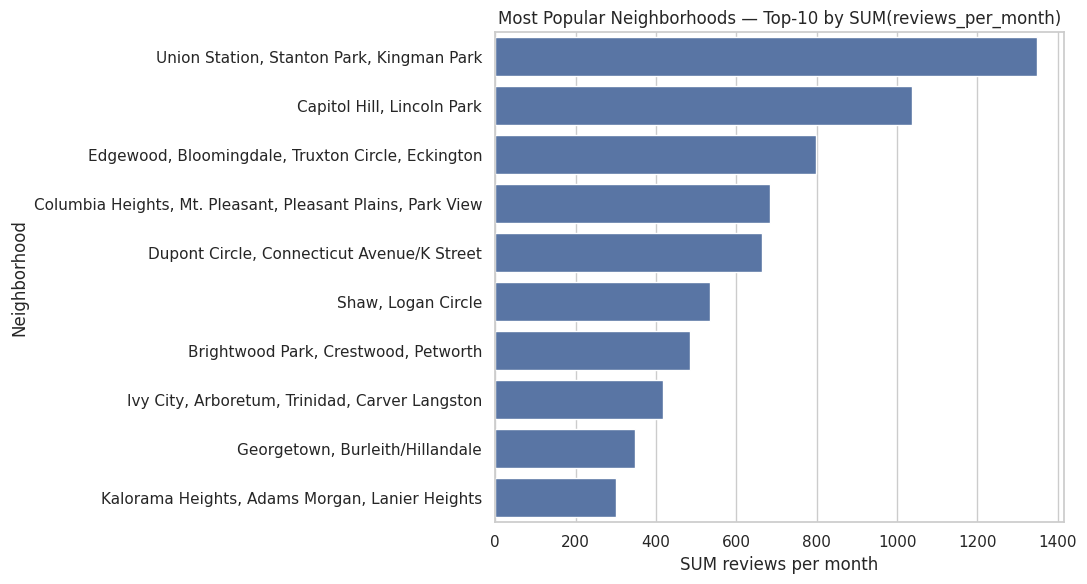

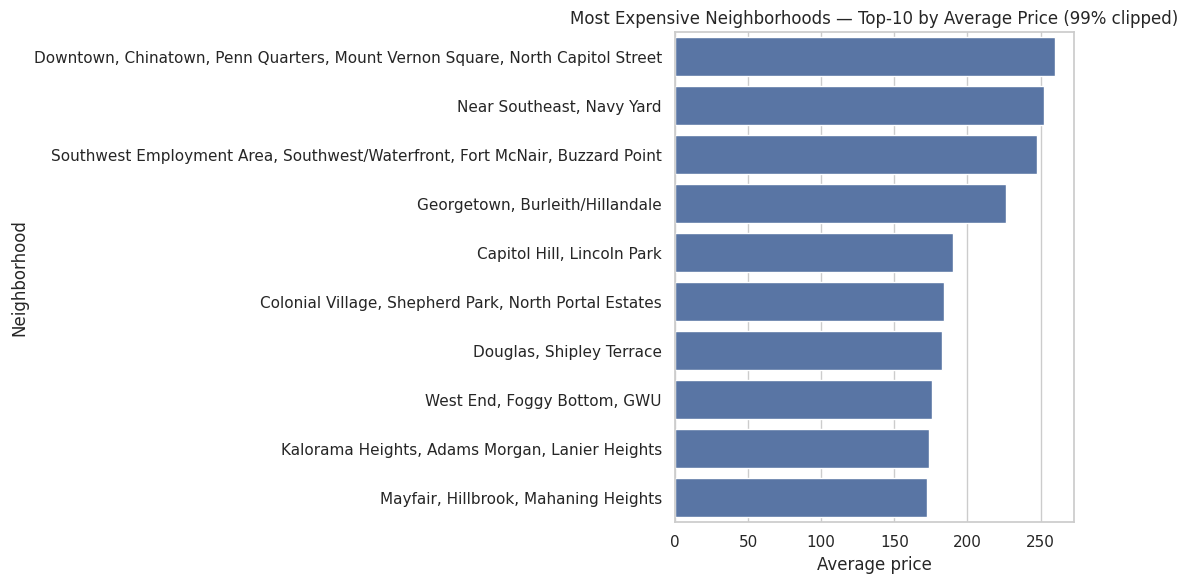

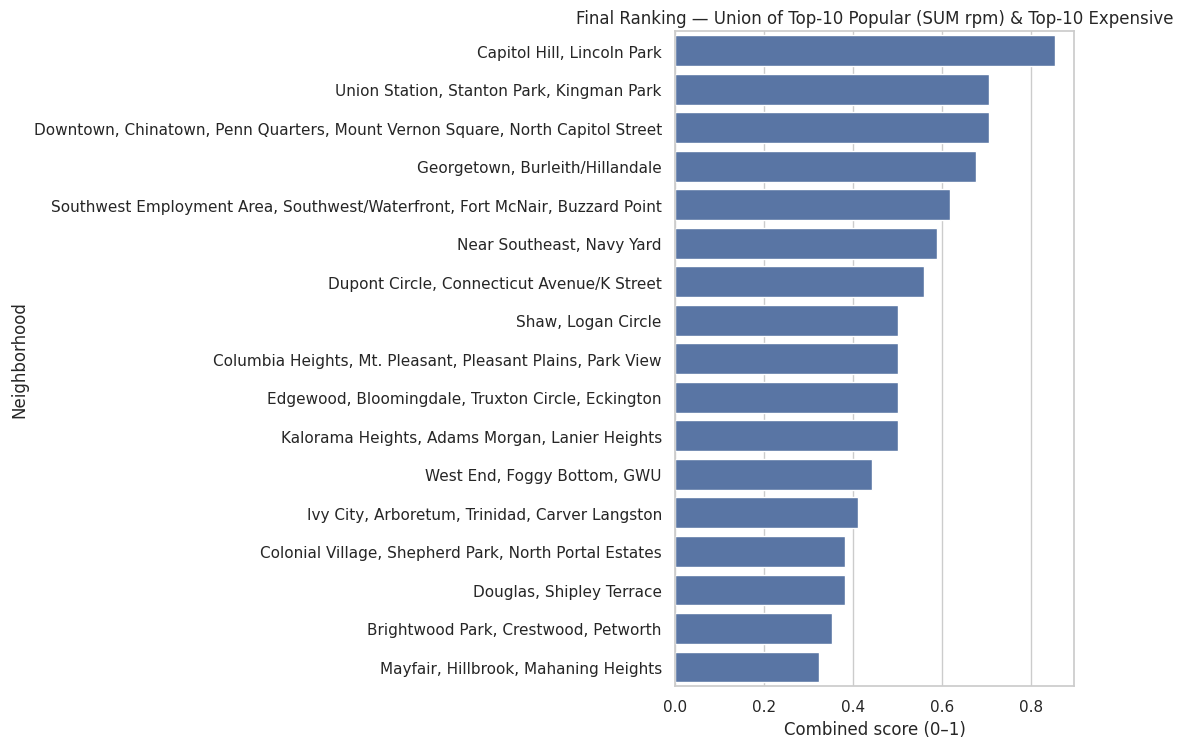

In [43]:
# ======================================================
# Top-10 neighborhoods:
# (1) Most popular = by SUM(reviews_per_month)
# (2) Most expensive = by average price
# Two separate bar charts + tables
# ======================================================

# ---------------------- Guard & base frame ----------------------
required = {'neighbourhood','price','reviews_per_month'}
missing = required.difference(df.columns)
if missing:
    raise KeyError(f"Missing required columns: {', '.join(missing)}")

tmp = df[['neighbourhood','price','reviews_per_month']].dropna().copy()
tmp['price'] = pd.to_numeric(tmp['price'], errors='coerce')
tmp['reviews_per_month'] = pd.to_numeric(tmp['reviews_per_month'], errors='coerce')
tmp = tmp.dropna(subset=['price','reviews_per_month'])
tmp['price_c'] = qclip(tmp['price'], 0.99)

# ---------------------- Aggregate per neighborhood ----------------------
neigh = (
    tmp.groupby('neighbourhood', as_index=False)
       .agg(
           listings        = ('price_c', 'count'),
           avg_price       = ('price_c', 'mean'),
           med_price       = ('price_c', 'median'),
           sum_reviews_pm  = ('reviews_per_month', 'sum')   # popularity = SUM rpm
       )
)

# ---------------------- Top-10 by popularity (SUM reviews_per_month) ----------------------
pop_top = (
    neigh.sort_values('sum_reviews_pm', ascending=False, kind='mergesort')
         .head(10)
         .reset_index(drop=True)
)
order_pop = pop_top['neighbourhood'].tolist()
fig_h_pop = max(6, 0.45 * len(order_pop))

plt.figure(figsize=(11, fig_h_pop))
sns.barplot(data=pop_top, y='neighbourhood', x='sum_reviews_pm', order=order_pop)
plt.title('Most Popular Neighborhoods — Top-10 by SUM(reviews_per_month)')
plt.xlabel('SUM reviews per month')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()


# ---------------------- Top-10 by price (most expensive) ----------------------
exp_top = (
    neigh.sort_values('avg_price', ascending=False, kind='mergesort')
         .head(10)
         .reset_index(drop=True)
)
order_exp = exp_top['neighbourhood'].tolist()
fig_h_exp = max(6, 0.45 * len(order_exp))

plt.figure(figsize=(11, fig_h_exp))
sns.barplot(data=exp_top, y='neighbourhood', x='avg_price', order=order_exp)
plt.title('Most Expensive Neighborhoods — Top-10 by Average Price (99% clipped)')
plt.xlabel('Average price')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()


# ======================================================
# FINAL UNION BLOCK — Top-10 Popular (SUM rpm) ∪ Top-10 Expensive
# Combined score = average(popularity_score, price_score) within the union set

PRICE_ORIENTATION = 'expensive'  # 'expensive' (higher price = better) or 'cheap' (lower price = better)

# Union of names
union_names = sorted(set(pop_top['neighbourhood']) | set(exp_top['neighbourhood']))
sel = neigh[neigh['neighbourhood'].isin(union_names)].copy().reset_index(drop=True)

# Popularity score: higher SUM(reviews_per_month) = better (percentile rank)
sel['popularity_score'] = sel['sum_reviews_pm'].rank(pct=True, method='average')

# Price score: orientation configurable
if PRICE_ORIENTATION == 'expensive':
    sel['price_score'] = sel['avg_price'].rank(pct=True, method='average')      # higher price = higher score
else:
    sel['price_score'] = (-sel['avg_price']).rank(pct=True, method='average')    # lower price = higher score

# Combined score: simple average
sel['combined_score'] = 0.5*sel['popularity_score'] + 0.5*sel['price_score']

# Plot final ranking
sel = sel.sort_values('combined_score', ascending=False).reset_index(drop=True)
order = sel['neighbourhood'].tolist()
fig_h = max(6, 0.45*len(order))

plt.figure(figsize=(11, fig_h))
sns.barplot(data=sel, y='neighbourhood', x='combined_score', order=order)
plt.title('Final Ranking — Union of Top-10 Popular (SUM rpm) & Top-10 Expensive')
plt.xlabel('Combined score (0–1)')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()


עשינו גרף שמראה את השכונות עם הכי הרבה ביקורות בחודש וגרף שמראה את השכונות הכי יקרות ולבסוף עשינו גרף שמציג דירוג שעושה ממוצע ביניהם מתוך מחשבה שמארח פוטנציאלי יתלבט בין לקנות נכס שעולה יקר לבין נכס שהוא מאוד פופולרי.

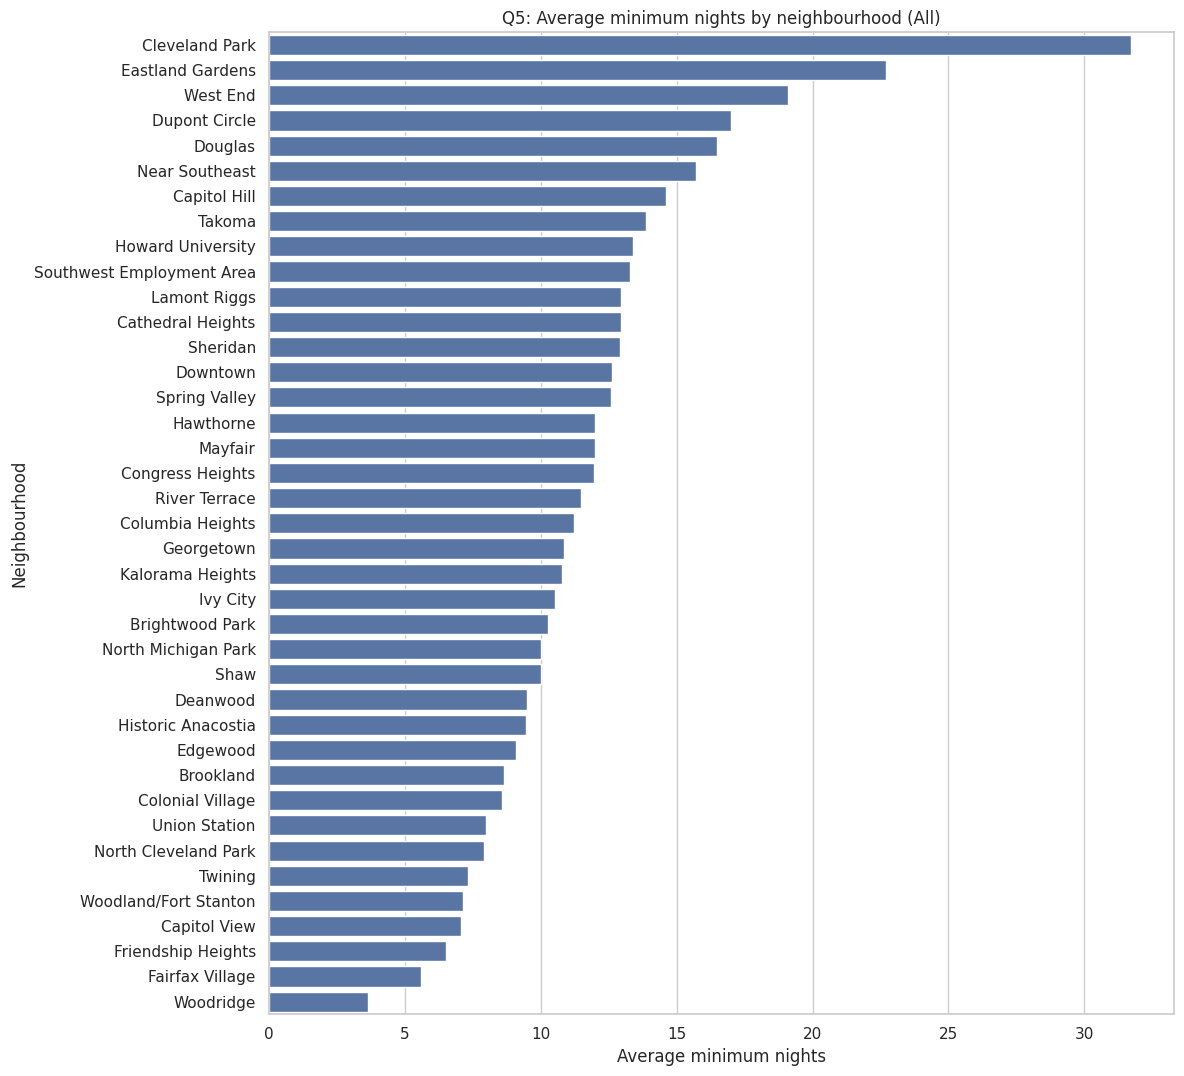

In [41]:
# Q5 — Average minimum nights by neighbourhood (All, short labels)


if {'neighbourhood','min_nights'}.issubset(df.columns):
    tmp = df[['neighbourhood','min_nights']].dropna().copy()
    tmp['min_nights'] = pd.to_numeric(tmp['min_nights'], errors='coerce').clip(lower=0, upper=90)
    tmp = tmp.dropna(subset=['min_nights'])

    mean_tbl = (tmp.groupby('neighbourhood', as_index=False)['min_nights']
                  .mean()
                  .rename(columns={'min_nights':'mean_min_nights'}))

    # Shorten neighbourhood labels up to the first comma
    mean_tbl['short_name'] = mean_tbl['neighbourhood'].astype(str).str.split(',').str[0].str.strip()

    mean_tbl = mean_tbl.sort_values('mean_min_nights', ascending=False)

    plt.figure(figsize=(12, max(6, 0.28*len(mean_tbl))))
    sns.barplot(data=mean_tbl, y='short_name', x='mean_min_nights', orient='h')
    plt.title('Q5: Average minimum nights by neighbourhood (All)')
    plt.xlabel('Average minimum nights'); plt.ylabel('Neighbourhood')
    plt.tight_layout(); plt.show()


הגרף מציג שעל פי ממוצע של אורכי שהייה מינימלים יש הבדל גדול בין אורכי השהייה המינימליים בין שכונות

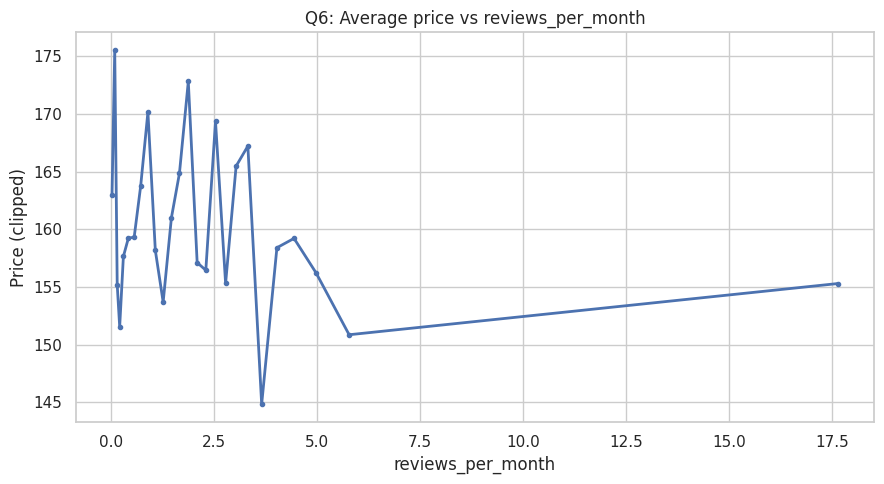

In [43]:
# Q6 — Price vs activity (more points via quantile bins)
# activity proxy = reviews_per_month (if exists) else number_of_reviews


proxy_col = 'reviews_per_month' if 'reviews_per_month' in df.columns else \
            ('number_of_reviews' if 'number_of_reviews' in df.columns else None)

if 'price' in df.columns and proxy_col is not None:
    tmp = df[['price', proxy_col]].dropna().copy()
    tmp['price_c'] = qclip(tmp['price'], 0.99)

    # More resolution: increase the number of quantile bins
    NBINS = 30  # adjust (e.g., 20, 40, 50) for finer/coarser resolution

    tmp['qbin'] = pd.qcut(tmp[proxy_col], q=NBINS, duplicates='drop')
    grp = (tmp.groupby('qbin', observed=True)['price_c']
              .mean().reset_index())

    # Numeric X-axis = bin centers for a smooth line
    grp['bin_center'] = grp['qbin'].apply(lambda iv: (iv.left + iv.right) / 2)
    grp = grp.sort_values('bin_center')

    plt.figure(figsize=(9, 5))
    plt.plot(grp['bin_center'], grp['price_c'], marker='o', markersize=3, linewidth=2)
    plt.title(f"Q6: Average price vs {proxy_col}")
    plt.xlabel(proxy_col)
    plt.ylabel('Price (clipped)')
    plt.tight_layout(); plt.show()


אין עמודת דירוג אז השתמשנו בביקורות בכל חודש ביחס למחיר והגרף לא הראה מגמה ברורה כלומר אין קשר כל כך בין המחיר לדירוג

/tmp/ipython-input-3659739559.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels(short_labels)
/tmp/ipython-input-3659739559.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(short_labels)


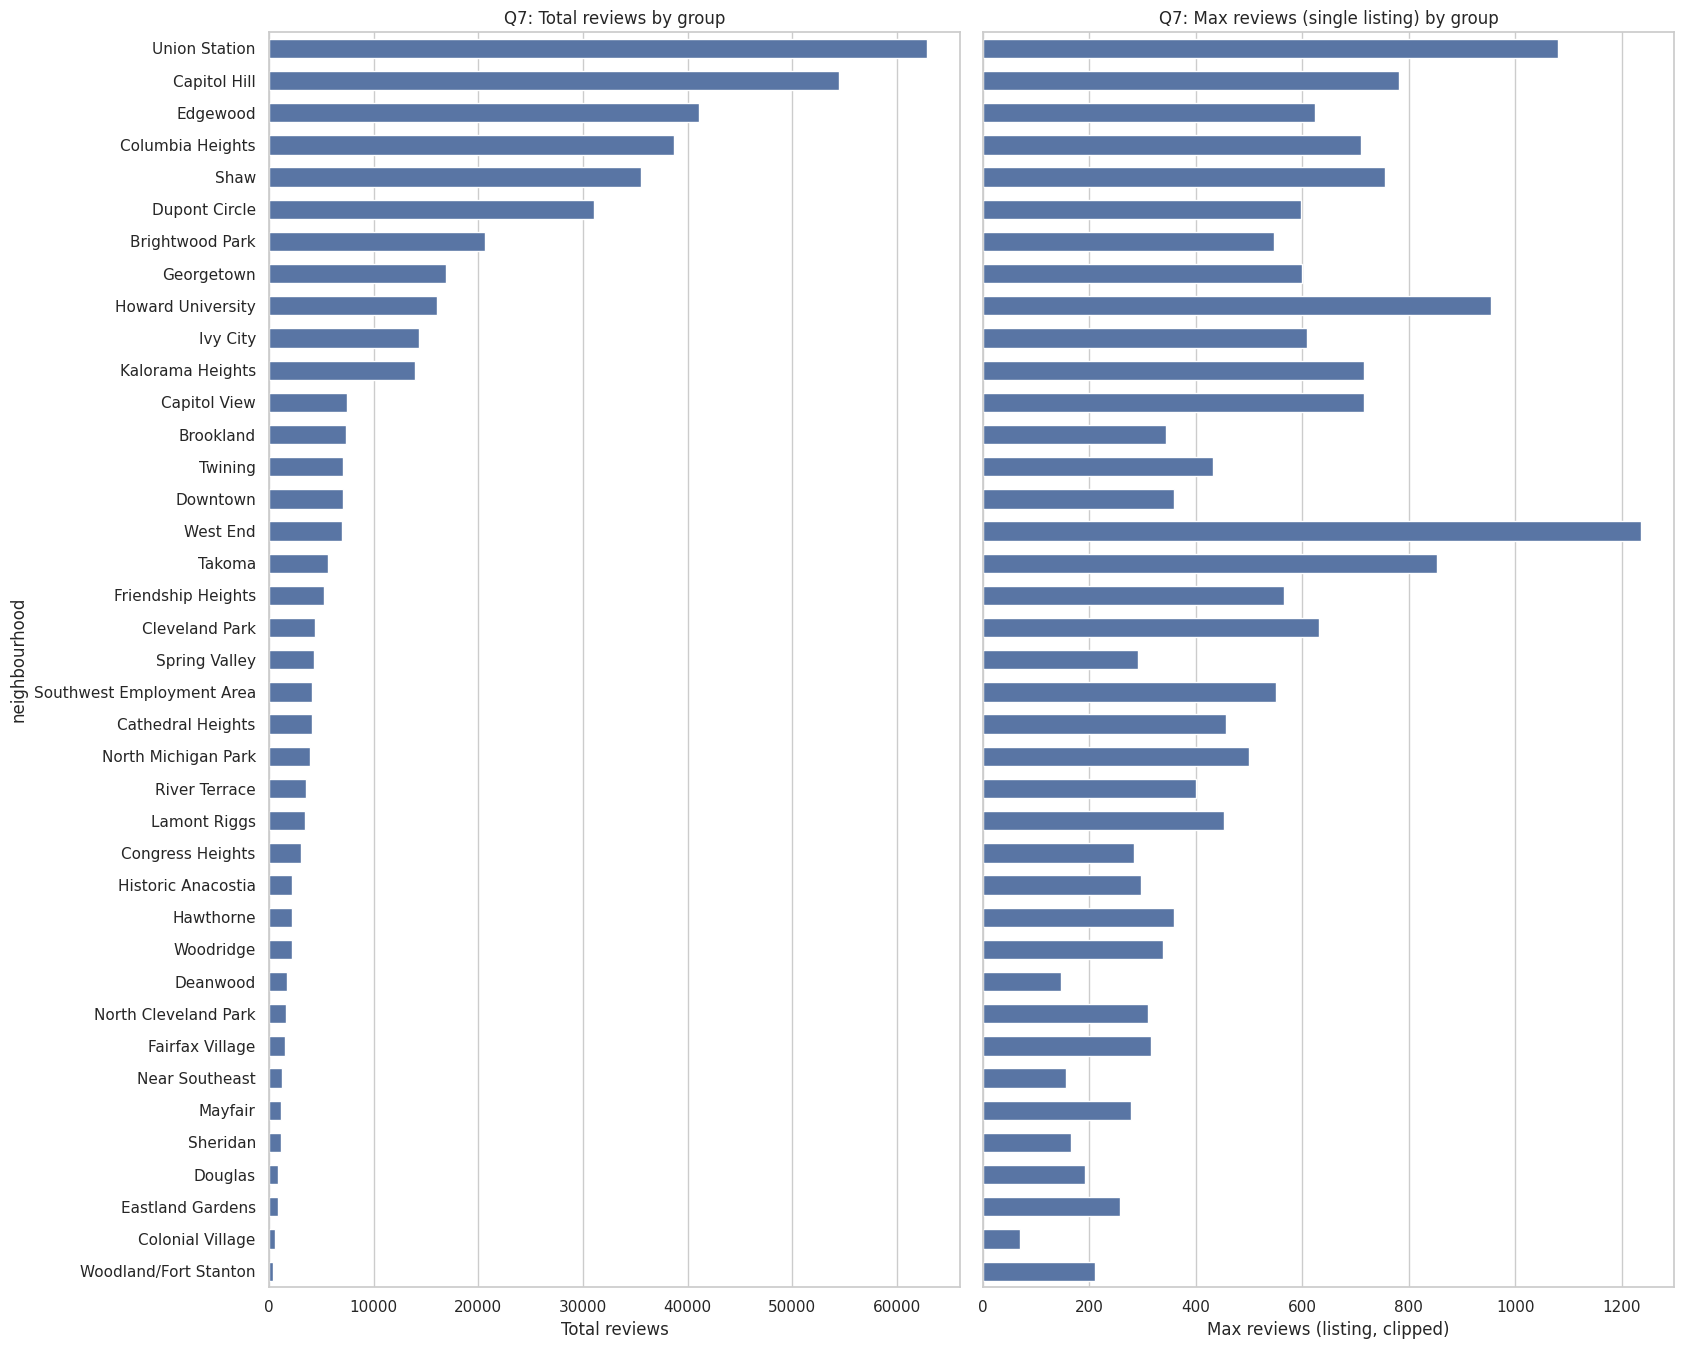

In [44]:
# Q7 — Reviews by neighbourhood group: total & max (All groups)
# Shows short labels (up to first comma) and extra spacing between categories


if {group_col,'number_of_reviews'}.issubset(df.columns):
    tmp = df[[group_col,'number_of_reviews']].dropna().copy()
    tmp['reviews_c'] = pd.to_numeric(tmp['number_of_reviews'], errors='coerce')

    # Aggregate per group: total reviews and max reviews for a single listing
    agg = tmp.groupby(group_col)['reviews_c'].agg(total='sum', max_='max').reset_index()

    # Sort by total reviews to set a consistent plotting order
    agg = agg.sort_values('total', ascending=False)
    order = agg[group_col].tolist()

    # Short text labels up to the first comma for readability
    short_labels = [str(s).split(',')[0].strip() for s in order]

    # Clip extreme upper tail of the max metric to keep axes readable
    max_clip = agg['max_'].quantile(0.99)

    # Dynamic height for clearer spacing; smaller bar width leaves gaps between categories
    fig_h = max(6, 0.35 * len(order))
    fig, axes = plt.subplots(1, 2, figsize=(17, fig_h), sharey=True)

    sns.barplot(data=agg, y=group_col, x='total', order=order, ax=axes[0], width=0.6)
    axes[0].set_title('Q7: Total reviews by neighbourhood')
    axes[0].set_xlabel('Total reviews'); axes[0].set_ylabel(group_col)
    axes[0].set_yticklabels(short_labels)

    sns.barplot(data=agg.assign(max_c=np.minimum(agg['max_'], max_clip)),
                y=group_col, x='max_c', order=order, ax=axes[1], width=0.6)
    axes[1].set_title('Q7: Max reviews (single listing) by group')
    axes[1].set_xlabel('Max reviews (listing, clipped)'); axes[1].set_ylabel('')
    axes[1].set_yticklabels(short_labels)

    fig.tight_layout(); plt.show()


הקובץ אינו מכיל קבוצת שכונות ולכן הצגנו כאן לפי כל שכונה בנפרד

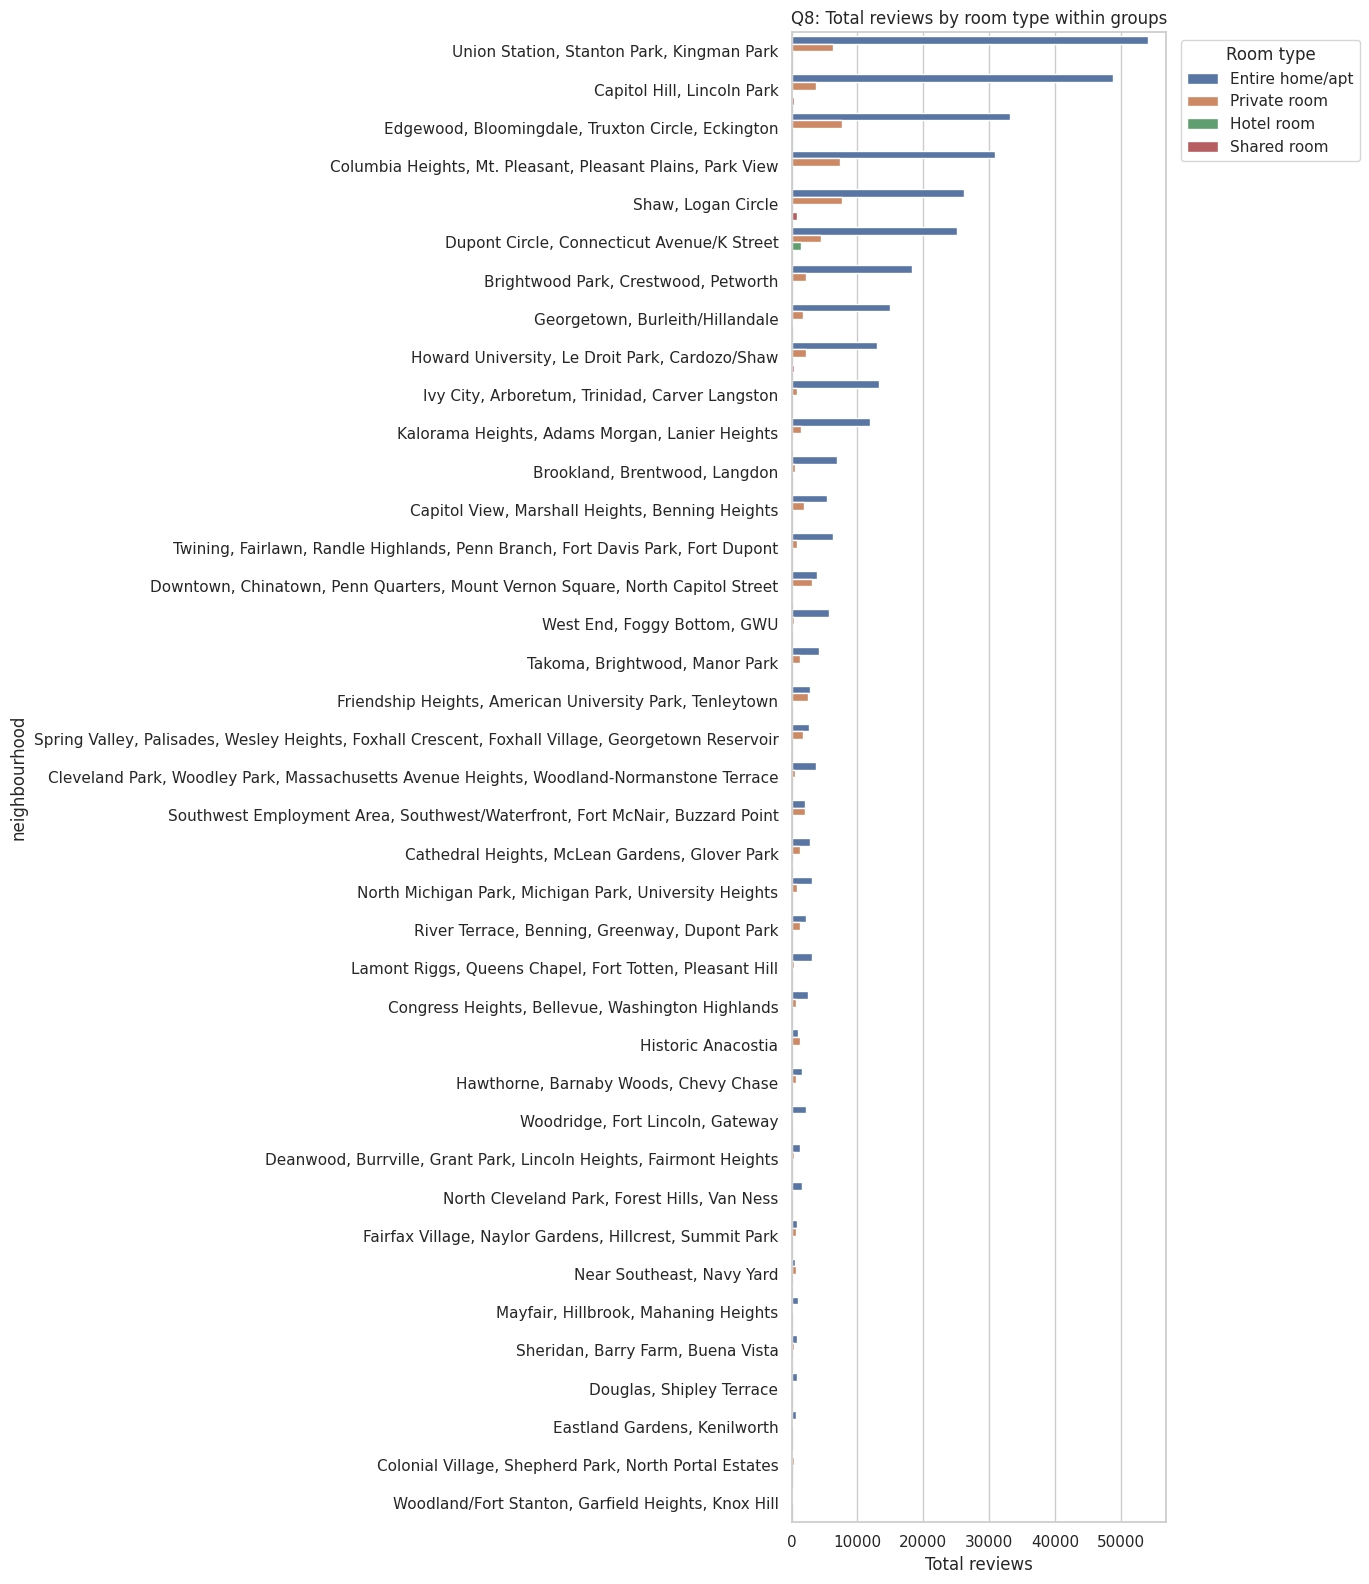

In [17]:
# Q8 — Within groups: which room type has most reviews (Top-10 groups)


if {group_col,'room_type','number_of_reviews'}.issubset(df.columns):
    tmp = df[[group_col,'room_type','number_of_reviews']].dropna().copy()
    tmp['reviews_c'] = pd.to_numeric(tmp['number_of_reviews'], errors='coerce').clip(
        upper=tmp['number_of_reviews'].quantile(0.99)
    )
    # Top-10 groups by total reviews to keep plot readable
    top_groups = (tmp.groupby(group_col)['reviews_c'].sum()
                    .sort_values(ascending=False).index)
    tmp = tmp[tmp[group_col].isin(top_groups)]
    agg = (tmp.groupby([group_col,'room_type'])['reviews_c'].sum().reset_index())

    plt.figure(figsize=(14,16))
    sns.barplot(data=agg, y=group_col, x='reviews_c', hue='room_type', order=top_groups)
    plt.title('Q8: Total reviews by room type within groups')
    plt.xlabel('Total reviews'); plt.ylabel(group_col)
    plt.legend(title='Room type', bbox_to_anchor=(1.02,1), loc='upper left')
    plt.tight_layout(); plt.show()

ביצענו את הגרף שמראה את סוג  הנכס הכי מועדף בכל שכונה כיוון שאין נתונים על קבוצת שכונות.
מהגרפים עולה כי בולטים בפער נכסים מסוג בית שלם.

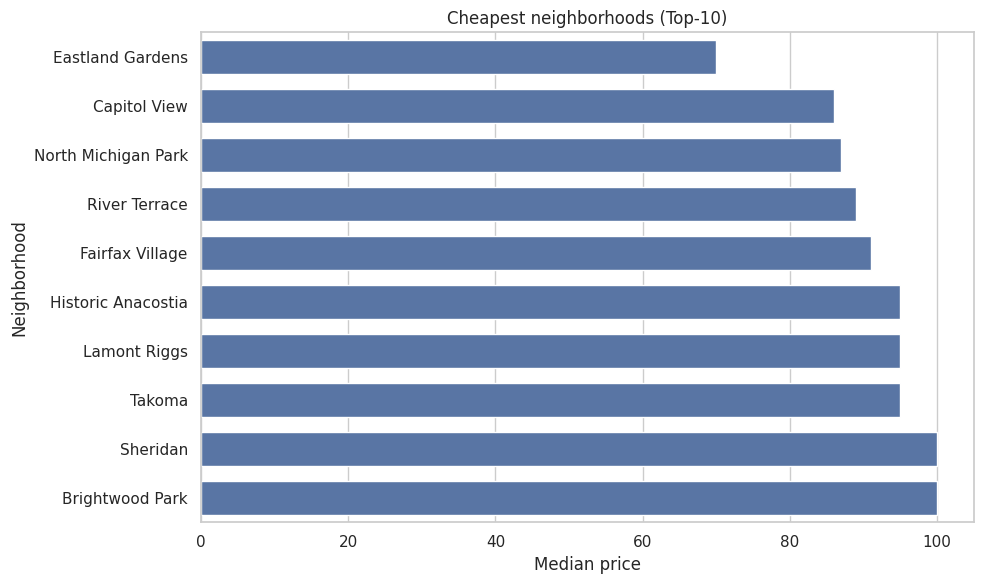

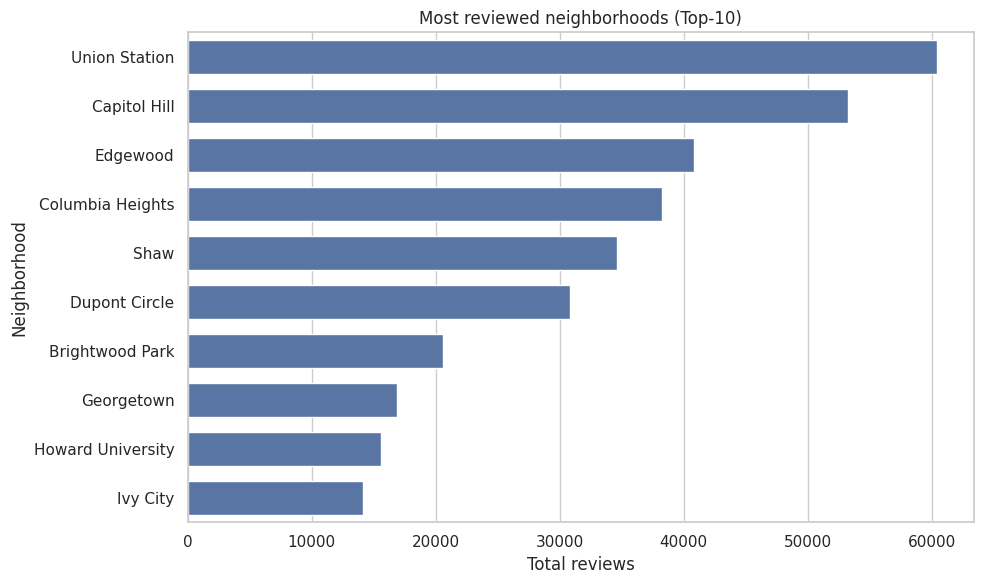

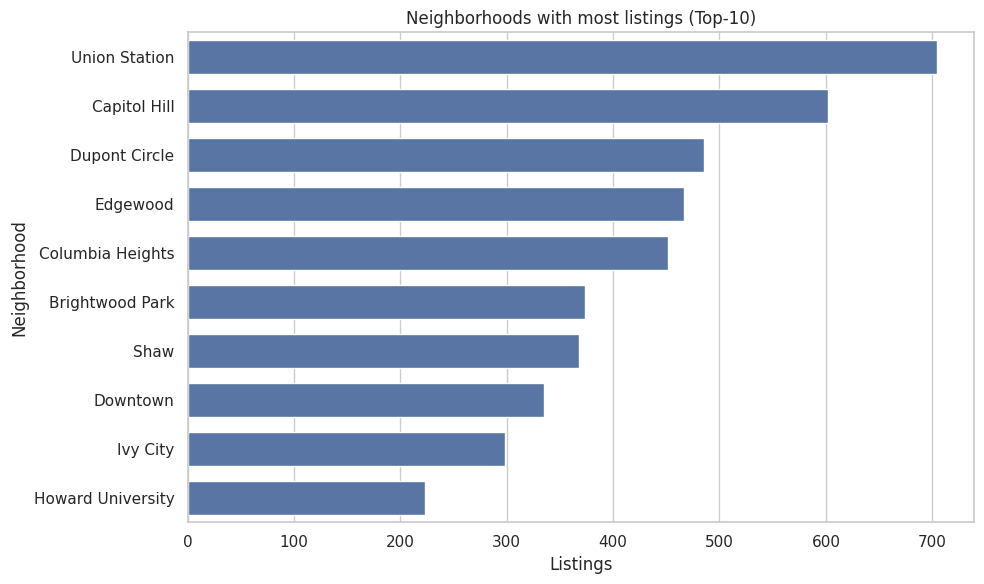

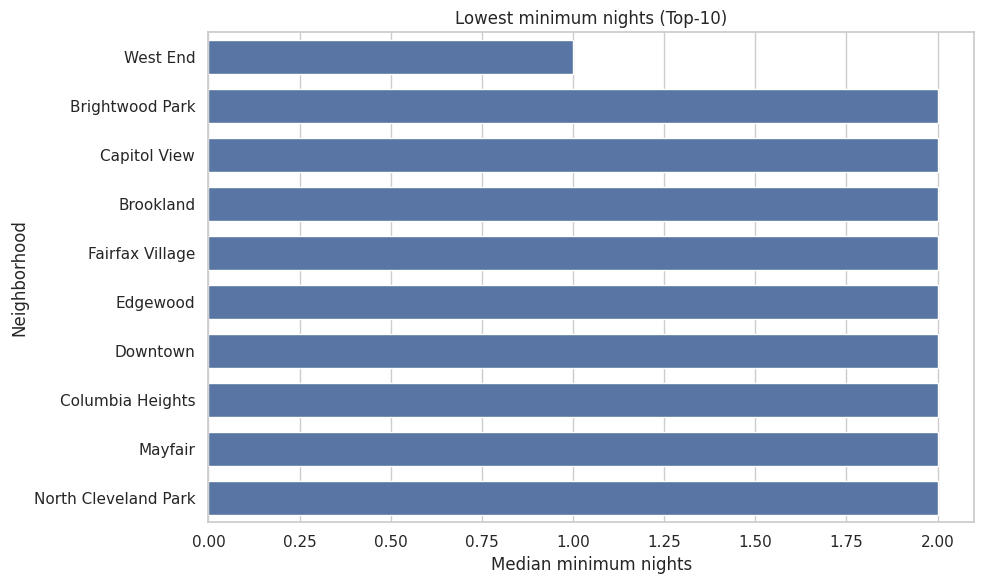

In [24]:
# Q9 — Neighborhood rankings:
# 1) Cheapest (by median price, 99% clip)
# 2) Most reviewed (by total number_of_reviews, 99% clip)
# 3) Most listings (count of listings)
# 4) Lowest minimum nights (by median of min_nights / minimum_nights)

TOP_N = 10  # change if you want a different list size

if 'neighbourhood' in df.columns:

    # ---------- 1) Cheapest neighborhoods ----------
    if 'price' in df.columns:
        t = df[['neighbourhood','price']].dropna().copy()
        t['price_c'] = qclip(pd.to_numeric(t['price'], errors='coerce'), 0.99)
        cheapest_tbl = (
            t.groupby('neighbourhood', as_index=False)['price_c']
             .median().rename(columns={'price_c':'median_price'})
        )
        cheapest_tbl['short'] = cheapest_tbl['neighbourhood'].astype(str).str.split(',').str[0].str.strip()
        cheapest = cheapest_tbl.sort_values('median_price', ascending=True).head(TOP_N)

        plt.figure(figsize=(10, max(6, 0.45*len(cheapest))))
        sns.barplot(data=cheapest, y='short', x='median_price', orient='h', width=0.7)
        plt.title(f'Cheapest neighborhoods (Top-{len(cheapest)})')
        plt.xlabel('Median price'); plt.ylabel('Neighborhood')
        plt.tight_layout(); plt.show()

    # ---------- 2) Most reviewed neighborhoods ----------
    if 'number_of_reviews' in df.columns:
        t = df[['neighbourhood','number_of_reviews']].dropna().copy()
        t['reviews_c'] = pd.to_numeric(t['number_of_reviews'], errors='coerce')\
                            .clip(upper=t['number_of_reviews'].quantile(0.99))
        reviews_tbl = (
            t.groupby('neighbourhood', as_index=False)['reviews_c']
             .sum().rename(columns={'reviews_c':'total_reviews'})
        )
        reviews_tbl['short'] = reviews_tbl['neighbourhood'].astype(str).str.split(',').str[0].str.strip()
        most_reviews = reviews_tbl.sort_values('total_reviews', ascending=False).head(TOP_N)

        plt.figure(figsize=(10, max(6, 0.45*len(most_reviews))))
        sns.barplot(data=most_reviews, y='short', x='total_reviews', orient='h', width=0.7)
        plt.title(f'Most reviewed neighborhoods (Top-{len(most_reviews)})')
        plt.xlabel('Total reviews'); plt.ylabel('Neighborhood')
        plt.tight_layout(); plt.show()

    # ---------- 3) Neighborhoods with most listings ----------
    listings_tbl = (
        df[['neighbourhood']].dropna()
          .groupby('neighbourhood', as_index=False)
          .size().rename(columns={'size':'listings'})
    )
    listings_tbl['short'] = listings_tbl['neighbourhood'].astype(str).str.split(',').str[0].str.strip()
    most_listings = listings_tbl.sort_values('listings', ascending=False).head(TOP_N)

    plt.figure(figsize=(10, max(6, 0.45*len(most_listings))))
    sns.barplot(data=most_listings, y='short', x='listings', orient='h', width=0.7)
    plt.title(f'Neighborhoods with most listings (Top-{len(most_listings)})')
    plt.xlabel('Listings'); plt.ylabel('Neighborhood')
    plt.tight_layout(); plt.show()

    # ---------- 4) Lowest minimum nights (median per neighborhood) ----------
    min_col = 'min_nights' if 'min_nights' in df.columns else ('minimum_nights' if 'minimum_nights' in df.columns else None)
    if min_col is not None:
        t = df[['neighbourhood', min_col]].dropna().copy()
        t[min_col] = pd.to_numeric(t[min_col], errors='coerce').clip(lower=0, upper=90)
        min_tbl = (
            t.groupby('neighbourhood', as_index=False)[min_col]
             .median().rename(columns={min_col:'median_min_nights'})
        )
        min_tbl['short'] = min_tbl['neighbourhood'].astype(str).str.split(',').str[0].str.strip()
        lowest_min = min_tbl.sort_values('median_min_nights', ascending=True).head(TOP_N)

        plt.figure(figsize=(10, max(6, 0.45*len(lowest_min))))
        sns.barplot(data=lowest_min, y='short', x='median_min_nights', orient='h', width=0.7)
        plt.title(f'Lowest minimum nights (Top-{len(lowest_min)})')
        plt.xlabel('Median minimum nights'); plt.ylabel('Neighborhood')
        plt.tight_layout(); plt.show()


הראינו גרפים שמראים את השכונות עם המחיר הכי נמוך, עם הכי הרבה ביקורות, הכי הרבה הזמנות והכמות מינימלית של ימים להזמנה הכי קטנה

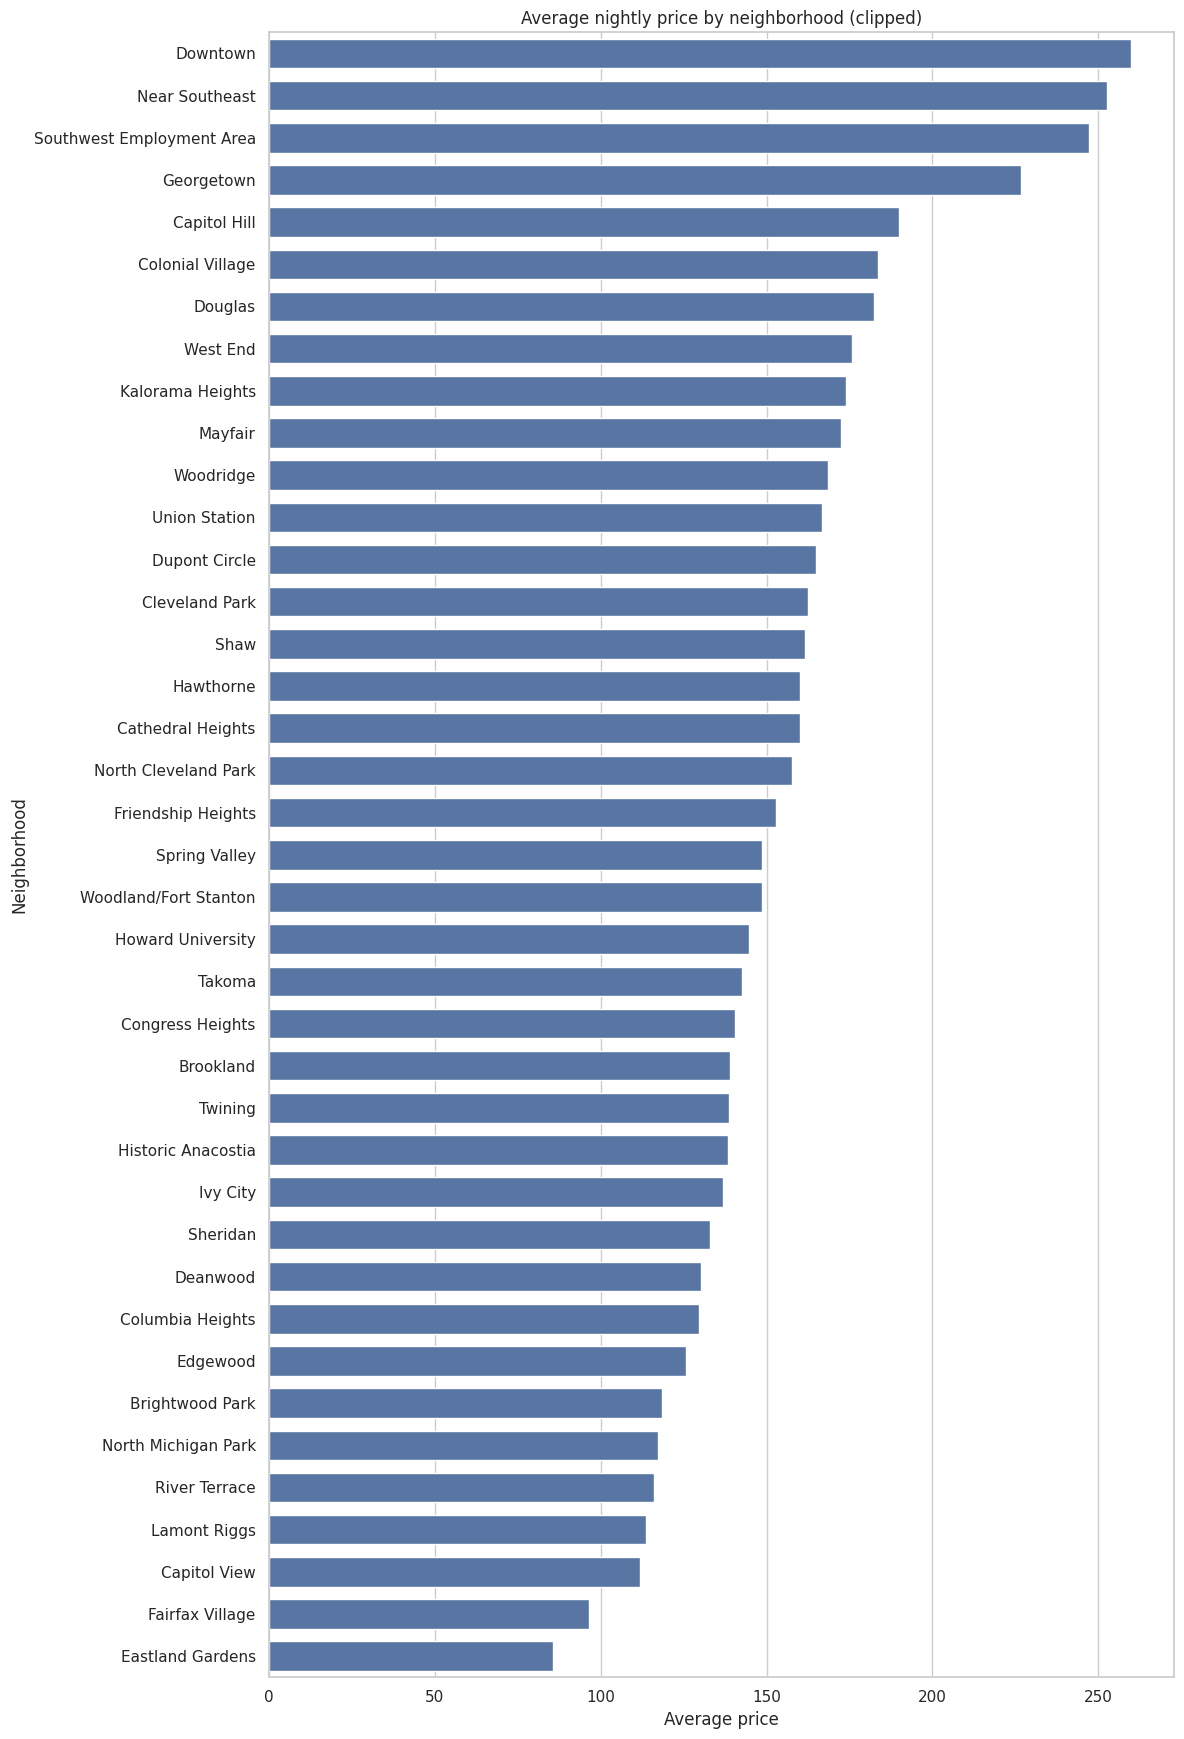

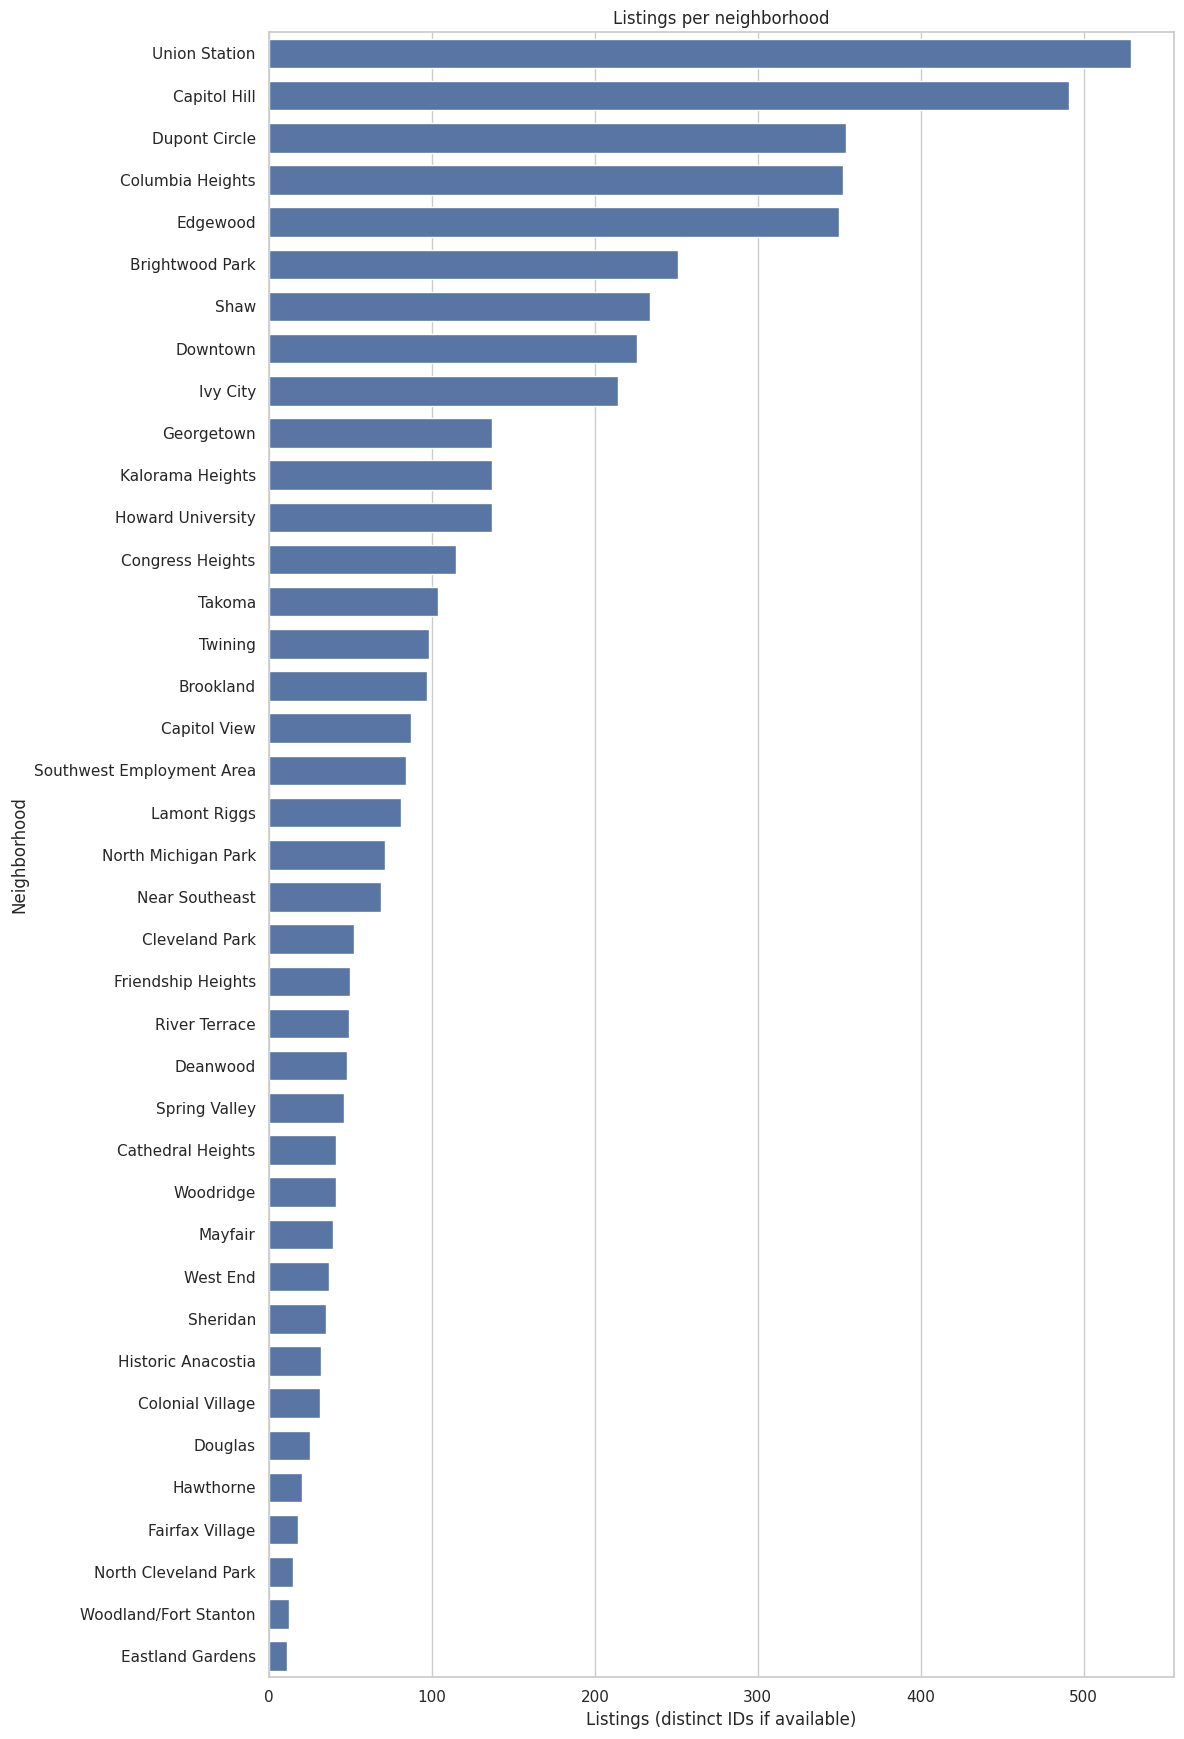

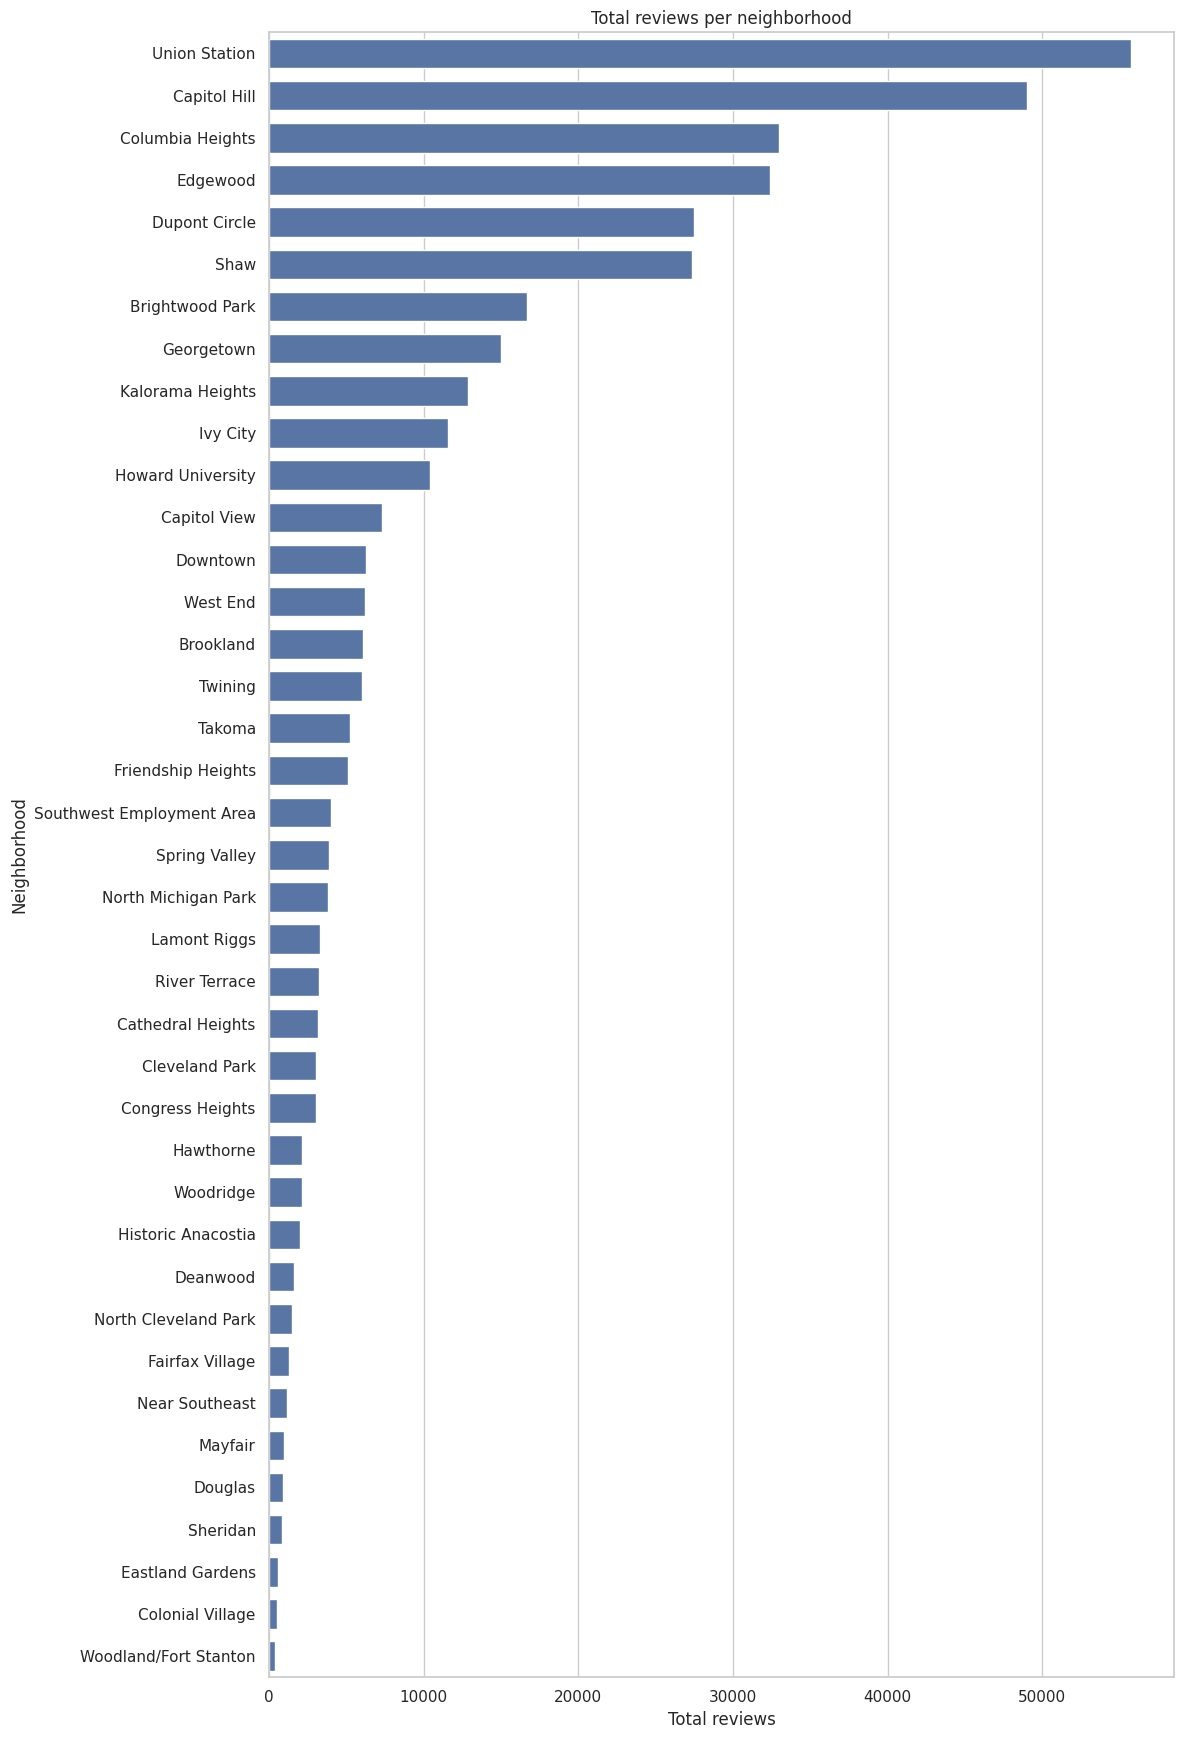

In [30]:
# Neighborhoods — three separate bar charts:
# (1) Average nightly price (clipped)
# (2) Listings count (distinct IDs if available; otherwise row count)
# (3) Total reviews
# Labels shortened up to first comma for readability


if {'neighbourhood','price','number_of_reviews'}.issubset(df.columns):
    # Base frame with types and readable scales
    cols = ['neighbourhood','price','number_of_reviews'] + (['id'] if 'id' in df.columns else [])
    tmp = df[cols].dropna(subset=['neighbourhood']).copy()
    tmp['price_c'] = qclip(pd.to_numeric(tmp['price'], errors='coerce'), 0.99)
    tmp['number_of_reviews'] = pd.to_numeric(tmp['number_of_reviews'], errors='coerce').fillna(0)
    tmp = tmp.dropna(subset=['price_c'])

    # Aggregations per neighbourhood
    price_tbl   = tmp.groupby('neighbourhood')['price_c'].mean()
    reviews_tbl = tmp.groupby('neighbourhood')['number_of_reviews'].sum()
    if 'id' in tmp.columns:
        # Listings computed as distinct listing IDs (robust to duplicates)
        listings_tbl = tmp.groupby('neighbourhood')['id'].nunique()
    else:
        # Fallback: number of rows as listings count
        listings_tbl = tmp.groupby('neighbourhood')['price_c'].size()

    # Merge to a single table
    agg = pd.concat([price_tbl, listings_tbl, reviews_tbl], axis=1).reset_index()
    agg.columns = ['neighbourhood', 'avg_price', 'listings', 'total_reviews']

    # Short labels up to the first comma for cleaner y-axis
    agg['short'] = agg['neighbourhood'].astype(str).str.split(',').str[0].str.strip()

    # ---------- (1) Average price ----------
    d1 = agg.sort_values('avg_price', ascending=False)
    fig_h = max(6, 0.45 * len(d1))
    plt.figure(figsize=(12, fig_h))
    sns.barplot(data=d1, y='short', x='avg_price', orient='h', width=0.7)
    plt.title('Average nightly price by neighborhood (clipped)')
    plt.xlabel('Average price'); plt.ylabel('Neighborhood')
    plt.tight_layout(); plt.show()

    # ---------- (2) Listings count ----------
    d2 = agg.sort_values('listings', ascending=False)
    fig_h = max(6, 0.45 * len(d2))
    plt.figure(figsize=(12, fig_h))
    sns.barplot(data=d2, y='short', x='listings', orient='h', width=0.7)
    plt.title('Listings per neighborhood')
    plt.xlabel('Listings (distinct IDs if available)'); plt.ylabel('Neighborhood')
    plt.tight_layout(); plt.show()

    # ---------- (3) Total reviews ----------
    d3 = agg.sort_values('total_reviews', ascending=False)
    fig_h = max(6, 0.45 * len(d3))
    plt.figure(figsize=(12, fig_h))
    sns.barplot(data=d3, y='short', x='total_reviews', orient='h', width=0.7)
    plt.title('Total reviews per neighborhood')
    plt.xlabel('Total reviews'); plt.ylabel('Neighborhood')
    plt.tight_layout(); plt.show()


הגרפים מראים ממוצע של מחיר ללילה בין שכונות כמות ביקורות לכל שכונה וכמות נכסים בכל שכונה

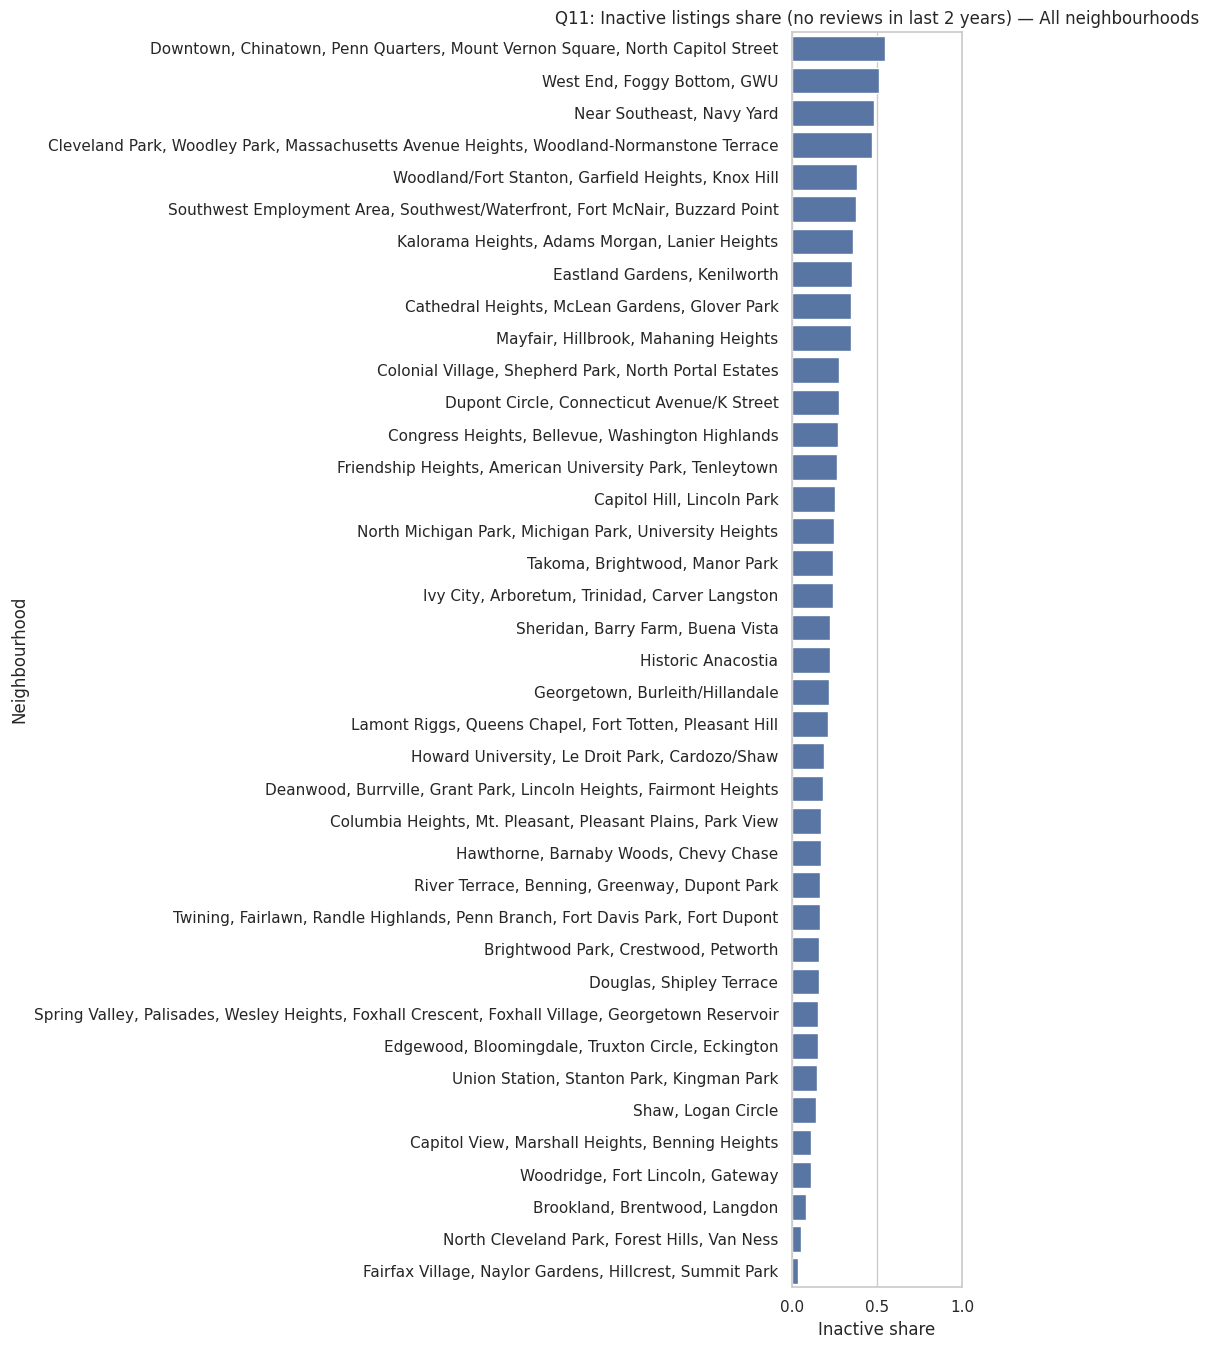

In [34]:
# Q11 — Share of inactive listings (no reviews in last 2 years) by neighbourhood (All)


if {'neighbourhood','last_review'}.issubset(df.columns):
    tmp = df[['neighbourhood','last_review']].dropna(subset=['neighbourhood']).copy()
    # Convert review date and mark inactivity (no review within the last 2 years)
    tmp['last_review'] = pd.to_datetime(tmp['last_review'], errors='coerce')
    cutoff = pd.Timestamp.today() - pd.DateOffset(years=2)
    tmp['inactive'] = ~(tmp['last_review'] >= cutoff)

    # Share of inactive listings per neighbourhood (include all)
    share_inactive = (tmp.groupby('neighbourhood')['inactive']
                        .mean().reset_index()
                        .rename(columns={'inactive':'inactive_share'}))

    # Order by highest inactive share and set dynamic figure height
    share_inactive = share_inactive.sort_values('inactive_share', ascending=False)
    order = share_inactive['neighbourhood'].tolist()
    fig_h = max(6, 0.35 * len(order))

    plt.figure(figsize=(10, fig_h))
    sns.barplot(data=share_inactive, y='neighbourhood', x='inactive_share', order=order)
    plt.title('Q11: Inactive listings share (no reviews in last 2 years) — All neighbourhoods')
    plt.xlabel('Inactive share'); plt.ylabel('Neighbourhood')
    plt.xlim(0, 1)
    plt.tight_layout(); plt.show()


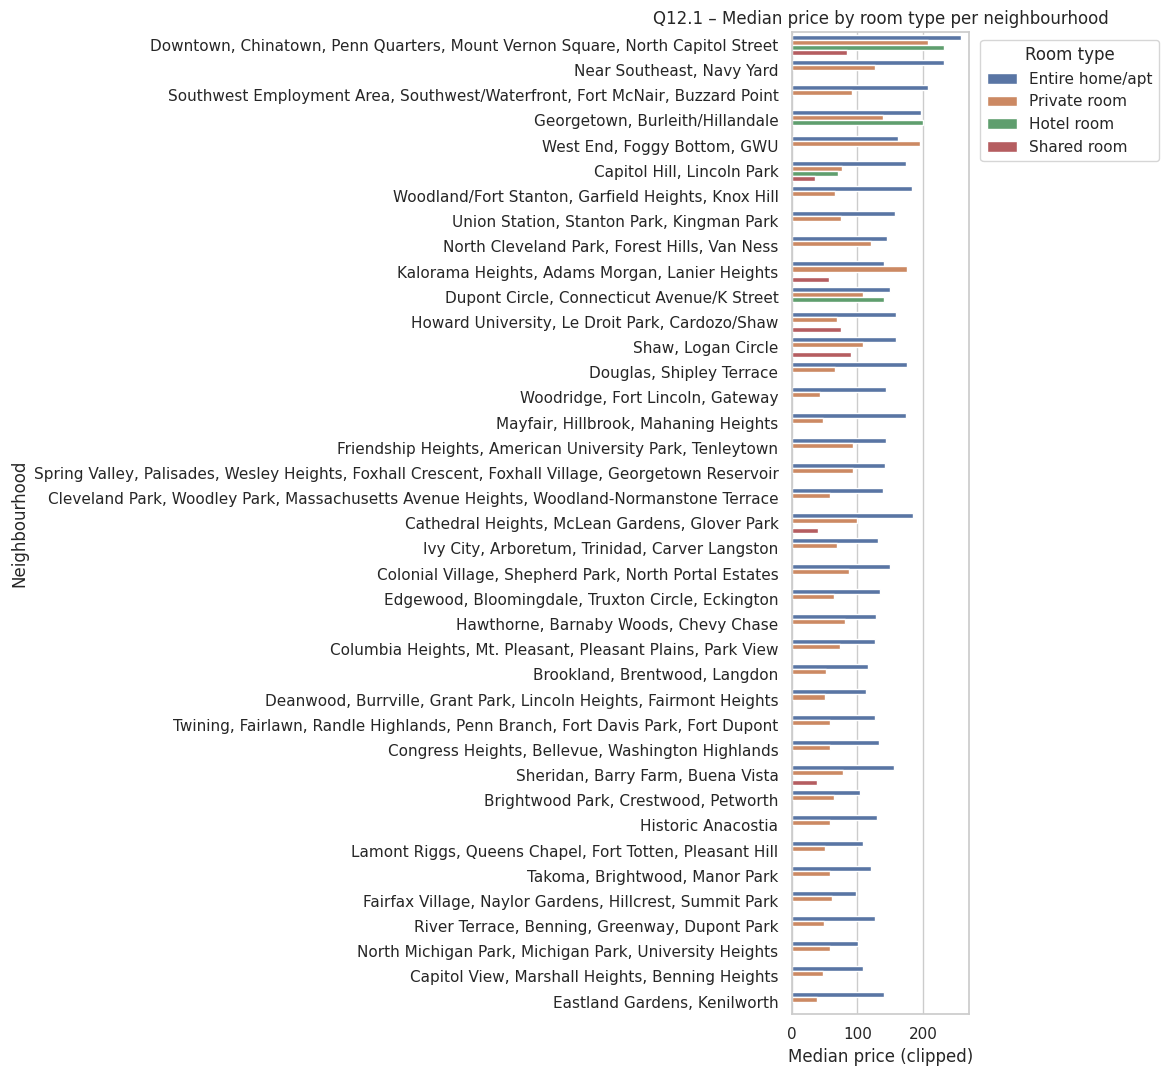

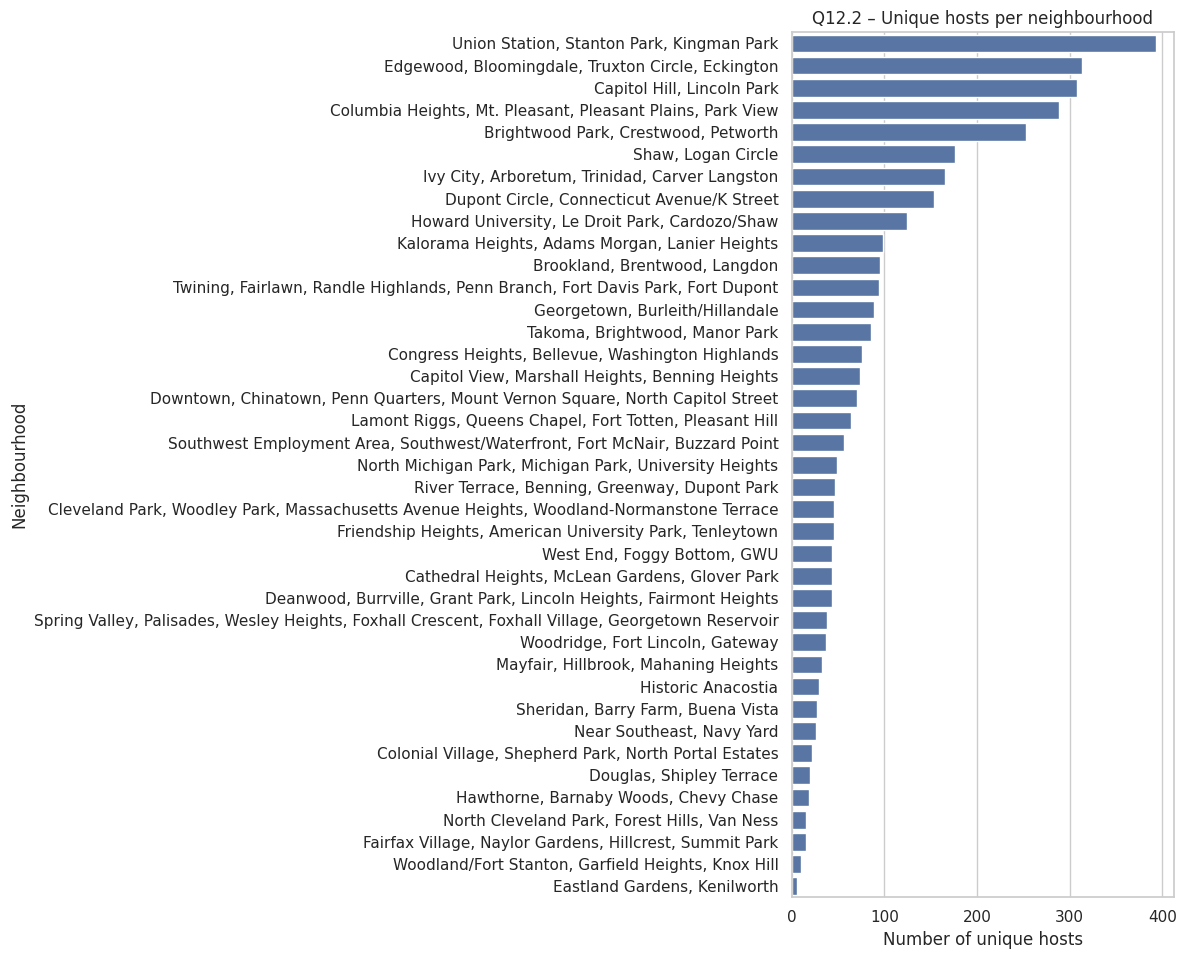

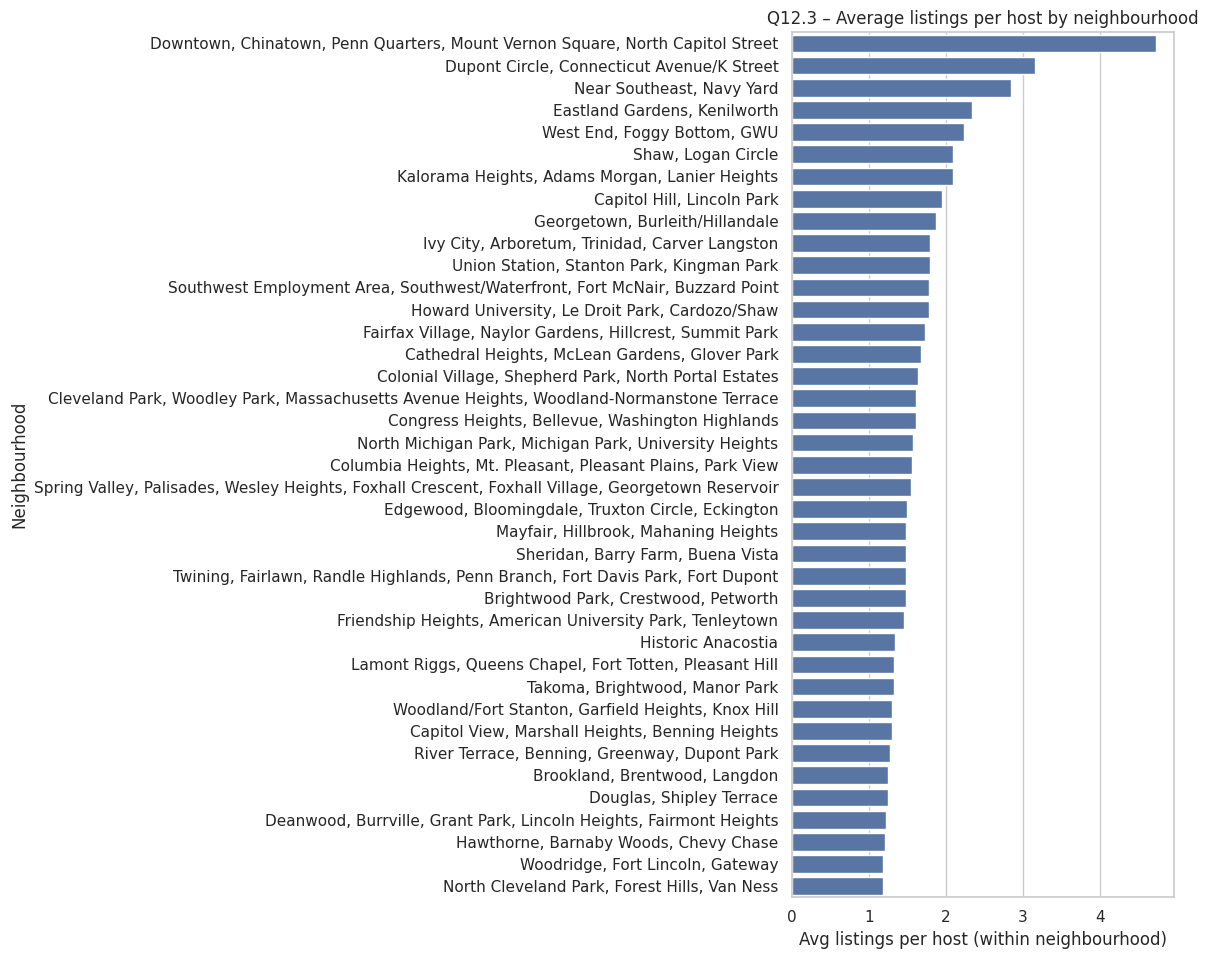

In [36]:
# Q12 — שלושה גרפים נפרדים, כל העמודות "על הצד" (Horizontal)
# מציג את כל השכונות, עם גובה דינמי לקריאות, וללא הדפסות בסוף

# בחירת עמודה לקיבוץ: שכונה (בהתאם לבקשה להציג את כל השכונות)
group12 = 'neighbourhood' if 'neighbourhood' in df.columns else None

# ---------- עזר לגובה דינמי ----------
def _fig_h_for_categories(n_cats: int, base: float = 8.0, per_cat: float = 0.25):
    # מחזיר גובה תרשים בהתאם למספר הקטגוריות כדי למנוע צפיפות
    return max(base, per_cat * max(n_cats, 1))

# ---------- המרות טיפוסים רלוונטיות ----------
if 'price' in df.columns:
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
if 'calculated_host_listings_count' in df.columns:
    df['calculated_host_listings_count'] = pd.to_numeric(df['calculated_host_listings_count'], errors='coerce')
if 'host_listings' in df.columns:
    df['host_listings'] = pd.to_numeric(df['host_listings'], errors='coerce')

# ======================================================
# Q12.1 — Median price by room type per neighbourhood (Horizontal)
# ======================================================
if group12 and {'room_type','price'}.issubset(df.columns):
    t = df[[group12, 'room_type', 'price']].dropna().copy()
    # חיתוך זנב עליון לשמירת קריאות
    t['price_c'] = qclip(t['price'], 0.99)

    # סדר שכונות לפי חציון מחיר כולל (ללא תלות ב-room_type) לקבלת סדר Y יציב
    order = (t.groupby(group12)['price_c']
               .median()
               .sort_values(ascending=False)
               .index)

    # מקבץ חציון מחיר לכל (שכונה × סוג חדר)
    g = (t.groupby([group12, 'room_type'])['price_c']
           .median()
           .reset_index())

    fig_h = _fig_h_for_categories(len(order), base=8, per_cat=0.28)
    plt.figure(figsize=(12, fig_h))
    sns.barplot(
        data=g,
        y=group12, x='price_c', hue='room_type',
        order=order, orient='h'
    )
    plt.title("Q12.1 – Median price by room type per neighbourhood")
    plt.xlabel("Median price (clipped)"); plt.ylabel("Neighbourhood")
    plt.legend(title="Room type", bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout(); plt.show()
else:
    print("Q12.1 skipped: required columns not found.")

# ======================================================
# Q12.2 — Unique hosts per neighbourhood (Horizontal)
# שימוש ב-host_id, ואם לא קיים — host_name
# ======================================================
host_key = 'host_id' if 'host_id' in df.columns else ('host_name' if 'host_name' in df.columns else None)
if group12 and host_key:
    t = df[[group12, host_key]].dropna().copy()
    g = (t.groupby(group12)[host_key]
           .nunique()
           .reset_index(name='unique_hosts')
           .sort_values('unique_hosts', ascending=False))
    order = g[group12].tolist()

    fig_h = _fig_h_for_categories(len(order), base=8, per_cat=0.25)
    plt.figure(figsize=(12, fig_h))
    sns.barplot(data=g, y=group12, x='unique_hosts', order=order, orient='h')
    plt.title("Q12.2 – Unique hosts per neighbourhood")
    plt.xlabel("Number of unique hosts"); plt.ylabel("Neighbourhood")
    plt.tight_layout(); plt.show()
else:
    print("Q12.2 skipped: required columns not found.")

# ======================================================
# Q12.3 — Average listings per host by neighbourhood (Horizontal, per-host within neighbourhood)
# Counts listings per (neighbourhood, host) and averages across hosts in that neighbourhood
# Fallback: if no host identifier exists, uses mean of host-level count column as before
# ======================================================
host_key = 'host_id' if 'host_id' in df.columns else ('host_name' if 'host_name' in df.columns else None)
listings_col = 'calculated_host_listings_count' if 'calculated_host_listings_count' in df.columns else (
               'host_listings' if 'host_listings' in df.columns else None)

if group12 and (host_key or listings_col):
    if host_key:
        # Per-host listing count within each neighbourhood
        t = df[[group12, host_key]].dropna().copy()
        per_host_counts = (t.groupby([group12, host_key])
                             .size()
                             .reset_index(name='host_listings_in_neigh'))
        g = (per_host_counts.groupby(group12)['host_listings_in_neigh']
                            .mean()
                            .reset_index()
                            .sort_values('host_listings_in_neigh', ascending=False))
        xcol = 'host_listings_in_neigh'
        xlab = 'Avg listings per host (within neighbourhood)'
    else:
        # Fallback: mean of host-level listings column (may reflect inventory beyond the neighbourhood)
        t = df[[group12, listings_col]].dropna().copy()
        t[listings_col] = pd.to_numeric(t[listings_col], errors='coerce')
        g = (t.groupby(group12)[listings_col]
               .mean()
               .reset_index()
               .sort_values(listings_col, ascending=False))
        xcol = listings_col
        xlab = 'Avg listings / host (source column)'

    order = g[group12].tolist()
    fig_h = _fig_h_for_categories(len(order), base=8, per_cat=0.25)

    plt.figure(figsize=(12, fig_h))
    sns.barplot(data=g, y=group12, x=xcol, order=order, orient='h')
    plt.title("Q12.3 – Average listings per host by neighbourhood")
    plt.xlabel(xlab); plt.ylabel("Neighbourhood")
    plt.tight_layout(); plt.show()
else:
    print("Q12.3 skipped: required columns not found.")





בדקנו עבור כל שכונה מה המחיר הממוצע עבור סוג נכס מסוים.
בנוסף בדקנו כמה מארחים יש בכל שכונה כדי לבדוק האם כדאי למארח לקנות שם נכס או שיש תחרות גבוהה מדי.
ולבסוף בדקנו מה הממוצע של מספר נכסים שיש לכל מארח בשכונה מסוימת כדי להבין אם באותה שכונה יש מונופול על הנכסים להשכרה.

In [46]:
# @title
# ===== Block 5: Save cleaned sample =====
out_path = os.path.join(OUTPUTS_DIR, 'listingsCleaned.csv')
df.to_csv(out_path, index=False)
print("Saved cleaned sample to:", out_path)


Saved cleaned sample to: /content/drive/MyDrive/IlayFisher_OfekCohen_airbnb/outputs/listingsCleaned.csv


במהלך חקר הנתונים ביצענו ניתוח מקיף של מאגר נתוני השכרה בעיר הנבחרת, לאחר תהליך יסודי של ניקוי נתונים שכלל הסרת ערכים חריגים (בייחוד מחירים בלתי סבירים מעל 5000 דולר ללילה) והבטחת עקביות במשתנים המרכזיים. הניתוח אפשר לקבל תמונה בהירה ומהימנה יותר של שוק ההשכרות  בעיר, תוך זיהוי מגמות עיקריות וקשרים בין משתנים.

מבחינת תמחור נמצא פער מובהק בין סוגי החדרים: דירות שלמות הן היקרות ביותר במונחים חציוניים, בעוד שחדרים פרטיים זולים משמעותית ומהווים אופציה נגישה יותר למטיילים בתקציב נמוך. קטגוריית חדרי מלון, אשר בתחילה הציגה מחירים דמיוניים של עשרות אלפי דולרים, התבררה כקטגוריה נגועה בערכים חריגים, ולאחר ניקוי הציגה טווח מחירים מציאותי של 100–500 דולר ללילה. בכך התחזקה התובנה כי לצורך חקר אמין של נתונים מסוג זה חיוני לבצע סינון ובקרה על ערכים קיצוניים.

בניתוח לפי שכונות עלו הבדלים מובהקים ברמות המחירים: שכונות מרכזיות ותיירותיות מאופיינות בממוצע מחירים גבוה, לעומת שכונות שוליות שבהן המחירים נגישים יותר. פערים אלה מצביעים על חשיבות המיקום כגורם מפתח בשוק ההשכרות, ומשקפים את אופי הביקוש העירוני.

בחינת הזמינות לאורך השנה חשפה דפוס ברור: נכסים הזמינים 365 ימים בשנה מתומחרים גבוה יותר ונוטים לקבל מספר רב של ביקורות, מה שמעיד על פעילות מסחרית-מקצועית של בעלי נכסים. לעומתם, נכסים פרטיים המושכרים לפרקי זמן מוגבלים מציגים זמינות נמוכה יותר ולעיתים גם פחות ביקורות. קשר זה מעלה כי קיימת הבחנה בין מארחים מזדמנים לבין שחקנים מסחריים המנהלים פורטפוליו רחב של נכסים.

ממד המארחים מדגיש כי חלק ניכר מהשוק נשלט על ידי מספר מצומצם של בעלי נכסים המחזיקים בעשרות דירות להשכרה. עובדה זו מצביעה על ריכוזיות בשוק ועל הפיכת אייר בי אנ בי ממודל שיתופי-קהילתי למנגנון עסקי מובהק, עם השפעות אפשריות על מחירי הדיור ותנועת התיירות בעיר.

מסקנות מרכזיות

לתיירים – חדרים פרטיים מהווים פתרון זול, בעוד שדירות שלמות מתאימות למבקשים פרטיות מלאה אך בעלות גבוהה יותר.
בנוסף למי שלא אכפת להיות קצת רחוק מהמרכז המסחרי והתיירותי שווה לשקול לשכור נכסים בשולי העיר. למרות שהם מאופיינים בדרך כלל בפחות ביקורות המחיר בשכונות השוליות נמוך בהרבה.

למשקיעים ומארחים – נכסים במרכז העיר בדרך כלל מתאפיינים במחיר גבוה יותר וכמות ביקורות גבוהה יותר. אמנם לפעמים יש מספר מצומצם של מארחים שמחזיקים בהרבה דירות להשכרה באיזור ועושים זאת בצורה מקצועית ולכן צריך לדעת האם משתלם להשכיר במקום כזה.

למדיניות ציבורית – ניכרת מגמת ריכוזיות וגידול בפעילות מסחרית, תופעה היכולה להצדיק דיון רגולטורי ביחס לשוק ההשכרות הקצרות.